<a href="https://colab.research.google.com/github/kidnixt/ObligatorioMachineLearning/blob/main/Obligatorio_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obligatorio Machine Learning para análisis de datos 2022
Johny Kidd - 228175

# Librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from google.colab import drive, files
import io

# Carga de datos 

In [ ]:
# Carga de los datos (desde drive)
drive.mount('/content/drive', force_remount=True)

dataset = pd.read_csv("/content/drive/My Drive/Machine Learning/Obligatorio/obligatorio.csv", sep = ",")

dataset

Mounted at /content/drive


,A,B,C,D,E,F,G,H,I,J,...,L,M,N,O,P,Q,R,S,T,Antecedentes
0,0,10,50257.0,0,0,0.000,0.0,0,0,MX,...,0,3,1,0,5,0.0,0.0,7.25,37.51,1
1,0,10,29014.0,0,0,0.000,0.0,0,0,MX,...,0,1,1,0,3,0.0,0.0,11.66,8.18,1
2,0,7,92.0,0,1,0.000,0.0,0,1,MX,...,0,3,1,0,2,0.0,0.0,86.97,13.96,1
3,9,16,50269.0,0,0,0.000,0.0,0,0,MX,...,0,3,1,0,5,0.0,0.0,2.51,93.67,1
4,0,8,8180.0,0,0,0.000,0.0,0,0,MX,...,0,1,1,0,1,0.0,0.0,25.96,135.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16842,0,3,63302.0,0,1,0.500,0.0,0,0,AR,...,1,1,1,0,1,0.0,0.0,85.73,132.17,1
16843,0,12,825.0,0,0,0.000,0.0,0,0,AR,...,1,1,1,0,5,0.0,0.0,12.50,26.34,1
16844,1,3,81067.0,0,0,0.000,0.0,0,0,AR,...,0,1,1,0,1,0.0,0.0,24.16,195.63,1
16845,0,9,398372.0,0,0,0.000,0.0,0,0,AR,...,0,2,1,0,1,0.0,0.0,29.00,36.97,1


Primero se prodecerá a realizar las partes 1, 2 y 3 del obligatorio ya que estas partes trabajan con un subconjunto de features de todo el dataset. Luego, para las partes posteriores, se realizara el EDA a **todo** el dataset y se trabajará con este de ahora en adelante

# Parte 1
Describir las siguientes columnas de manera individual (sin analizar relaciones entre ellas): B, C, J, K, S, T, Antecedentes:  
• Puede utilizar medidas como: media, mediana, cuartiles, entre otras.  
• Puede utilizar visualizaciones gráficas de manera de facilitar el entendimiento de los datos.


In [ ]:
#Creamos nuevo dataset con ese conjunto de features.
datasetUNO = dataset[['B','C','J','K','S','T','Antecedentes']].copy()
datasetUNO

,B,C,J,K,S,T,Antecedentes
0,10,50257.0,MX,0.80,7.25,37.51,1
1,10,29014.0,MX,NaN,11.66,8.18,1
2,7,92.0,MX,NaN,86.97,13.96,1
3,16,50269.0,MX,0.91,2.51,93.67,1
4,8,8180.0,MX,NaN,25.96,135.40,1
...,...,...,...,...,...,...,...
16842,3,63302.0,AR,NaN,85.73,132.17,1
16843,12,825.0,AR,NaN,12.50,26.34,1
16844,3,81067.0,AR,0.72,24.16,195.63,1
16845,9,398372.0,AR,NaN,29.00,36.97,1


In [ ]:
# Identificamos las variables del data frame y sus caracteristicas
datasetUNO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16847 entries, 0 to 16846
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   B             16847 non-null  int64  
 1   C             13652 non-null  float64
 2   J             16847 non-null  object 
 3   K             4009 non-null   float64
 4   S             16847 non-null  float64
 5   T             16847 non-null  float64
 6   Antecedentes  16847 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 921.4+ KB


In [ ]:
#valores de media, mediana, desviación, entre otros para las columnas numéricas
datasetUNO.describe()

,B,C,K,S,T,Antecedentes
count,16847.000000,13652.000000,4009.000000,16847.000000,16847.000000,16847.000000
mean,7.654953,39189.982713,0.681901,29.160839,162.023458,0.273699
std,4.683369,90877.881158,0.153276,26.519063,275.692415,0.445869
min,-1.000000,0.000000,0.120000,-1.000000,0.050000,0.000000
25%,4.000000,1171.750000,0.580000,9.600000,33.885000,0.000000
50%,7.000000,6171.500000,0.680000,20.660000,81.850000,0.000000
75%,11.000000,26897.500000,0.800000,39.235000,193.590000,1.000000
max,20.000000,617324.000000,0.990000,99.970000,12538.440000,1.000000


In [ ]:
# Porcentaje de valores nulos
datasetUNO.isnull().mean()

B               0.000000
C               0.189648
J               0.000000
K               0.762035
S               0.000000
T               0.000000
Antecedentes    0.000000
dtype: float64

Se puede ver que tenemos valores nulos en las columnas C y K. Hay un alto porcentaje de nulos en la columna K. Luego se verá que se hará con respecto a esto al momento de analizar el dataset original.

## Columna B
Variable numérica. Como vimos anteriormente esta variable no tiene valores nulos

In [ ]:
#Creamos dataset solo con esa columna
datasetUNO_B = datasetUNO['B'].copy()
datasetUNO_B

0        10
1        10
2         7
3        16
4         8
         ..
16842     3
16843    12
16844     3
16845     9
16846    12
Name: B, Length: 16847, dtype: int64

In [ ]:
#valores de media, mediana, desviación, entre otros para columna B
datasetUNO_B.describe()

count    16847.000000
mean         7.654953
std          4.683369
min         -1.000000
25%          4.000000
50%          7.000000
75%         11.000000
max         20.000000
Name: B, dtype: float64

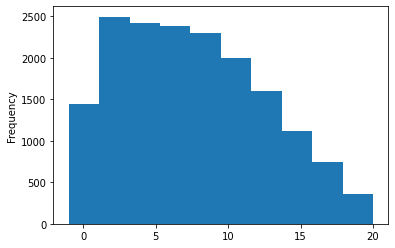

In [ ]:
# Histograma 
datasetUNO_B.plot.hist()

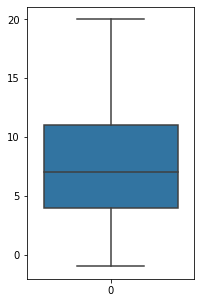

In [ ]:
#Boxplot
plt.figure(figsize=(3,5))
sns.boxplot(data = datasetUNO_B)

En este boxplot se pueden ver los valores de la media, mediana, los cuartiles, los máximos y mínimos. Y lo más importante, no tiene outliers

## Columna C
Variable numérica. Como vimos anteriormente esta variable tiene valores nulos. Para este análisis ignoraremos esto. Pero para las modificaciones del dataset original será solucionado

In [ ]:
#Creamos dataset solo con esa columna
datasetUNO_C = datasetUNO['C'].copy()
datasetUNO_C

0         50257.0
1         29014.0
2            92.0
3         50269.0
4          8180.0
           ...   
16842     63302.0
16843       825.0
16844     81067.0
16845    398372.0
16846     15128.0
Name: C, Length: 16847, dtype: float64

In [ ]:
#valores de media, mediana, desviación, entre otros para columna B
datasetUNO_C.describe()

count     13652.000000
mean      39189.982713
std       90877.881158
min           0.000000
25%        1171.750000
50%        6171.500000
75%       26897.500000
max      617324.000000
Name: C, dtype: float64

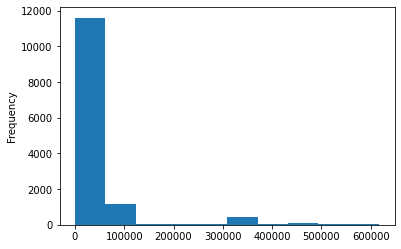

In [ ]:
#Histograma 
datasetUNO_C.plot.hist()

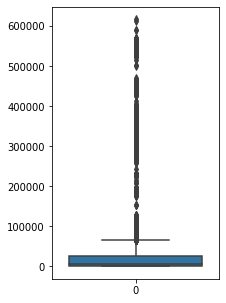

In [ ]:
#Boxplot
plt.figure(figsize=(3,5))
sns.boxplot(data = datasetUNO_C)

En este boxplot se pueden ver los valores de la media, mediana, los cuartiles, los máximos y mínimos. Podemos observar que tiene una **gran** cantidad de outliers. Luego serán eliminados

## Columna J
Variable categórica. No presenta valores nulos


In [ ]:
#Creamos dataset solo con esa columna
datasetUNO_J = datasetUNO['J'].copy()
datasetUNO_J

0        MX
1        MX
2        MX
3        MX
4        MX
         ..
16842    AR
16843    AR
16844    AR
16845    AR
16846    AR
Name: J, Length: 16847, dtype: object

In [ ]:
# Valores únicos de las variables categoricas
datasetUNO_J.unique()

array(['MX', 'BR', 'US', 'ES', 'UY', 'AR'], dtype=object)

In [ ]:
# Frecuencia de los valores de las variables categóricas
datasetUNO_J.value_counts()

UY    9329
AR    4428
BR    2366
ES     314
US     230
MX     180
Name: J, dtype: int64

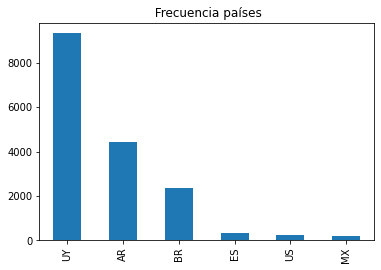

In [ ]:
#Plot de frecuencia
datasetUNO_J.value_counts().plot(kind='bar', title=' Frecuencia países')

Podemos ver que que Uruguay, Argentina y Brasil son los países que tienen más peso en el dataset. Por lo tanto cuando trabajemos con el dataset original, podriamos quitar las demás

## Columna K
Variable numérica. Como vimos anteriormente esta variable tiene valores nulos. Para este análisis ignoraremos esto. Pero para las modificaciones del dataset original será solucionado

In [ ]:
#Creamos dataset solo con esa columna
datasetUNO_K = datasetUNO['K'].copy()
datasetUNO_K

0        0.80
1         NaN
2         NaN
3        0.91
4         NaN
         ... 
16842     NaN
16843     NaN
16844    0.72
16845     NaN
16846     NaN
Name: K, Length: 16847, dtype: float64

In [ ]:
#valores de media, mediana, desviación, entre otros para columna K
datasetUNO_K.describe()

count    4009.000000
mean        0.681901
std         0.153276
min         0.120000
25%         0.580000
50%         0.680000
75%         0.800000
max         0.990000
Name: K, dtype: float64

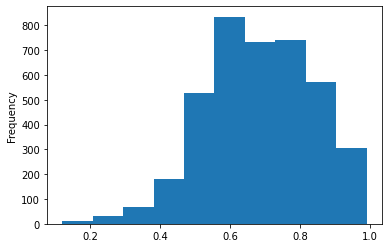

In [ ]:
#Histograma 
datasetUNO_K.plot.hist()

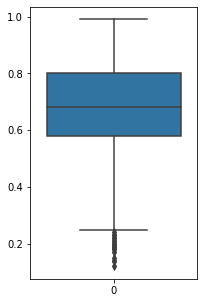

In [ ]:
#Boxplot
plt.figure(figsize=(3,5))
sns.boxplot(data = datasetUNO_K)

En este boxplot se pueden ver los valores de la media, mediana, los cuartiles, los máximos y mínimos. Podemos observar que tiene una gran cantidad de outliers. Luego serán eliminados

## Columna S
Variable numérica. Como vimos anteriormente esta variable no tiene valores nulos

In [ ]:
#Creamos dataset solo con esa columna
datasetUNO_S = datasetUNO['S'].copy()
datasetUNO_S

0         7.25
1        11.66
2        86.97
3         2.51
4        25.96
         ...  
16842    85.73
16843    12.50
16844    24.16
16845    29.00
16846    87.08
Name: S, Length: 16847, dtype: float64

In [ ]:
#valores de media, mediana, desviación, entre otros para columna B
datasetUNO_S.describe()

count    16847.000000
mean        29.160839
std         26.519063
min         -1.000000
25%          9.600000
50%         20.660000
75%         39.235000
max         99.970000
Name: S, dtype: float64

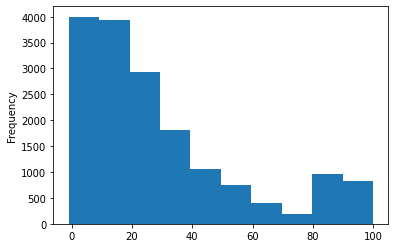

In [ ]:
#Histograma 
datasetUNO_S.plot.hist()

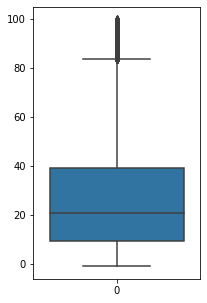

In [ ]:
#Boxplot
plt.figure(figsize=(3,5))
sns.boxplot(data = datasetUNO_S)

En este boxplot se pueden ver los valores de la media, mediana, los cuartiles, los máximos y mínimos. Podemos observar que tiene una gran cantidad de outliers. Luego serán eliminados

## Columna T
Variable numérica. Como vimos anteriormente esta variable no tiene valores nulos

In [ ]:
#Creamos dataset solo con esa columna
datasetUNO_T = datasetUNO['T'].copy()
datasetUNO_T

0         37.51
1          8.18
2         13.96
3         93.67
4        135.40
          ...  
16842    132.17
16843     26.34
16844    195.63
16845     36.97
16846     21.58
Name: T, Length: 16847, dtype: float64

In [ ]:
#valores de media, mediana, desviación, entre otros para columna B
datasetUNO_T.describe()

count    16847.000000
mean       162.023458
std        275.692415
min          0.050000
25%         33.885000
50%         81.850000
75%        193.590000
max      12538.440000
Name: T, dtype: float64

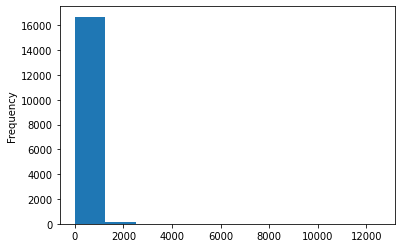

In [ ]:
#Histograma 
datasetUNO_T.plot.hist()

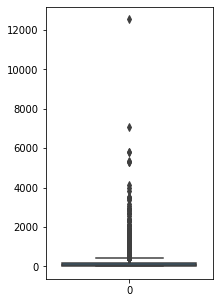

In [ ]:
#Boxplot
plt.figure(figsize=(3,5))
sns.boxplot(data = datasetUNO_T)

En este boxplot se pueden ver los valores de la media, mediana, los cuartiles, los máximos y mínimos. Podemos observar que tiene una gran cantidad de outliers. Luego serán eliminados

## Antecedentes
Variable categórica. No presenta valores nulos. Es la variable target que debemos predecir

In [ ]:
#Creamos dataset solo con esa columna
datasetUNO_Ant = datasetUNO['Antecedentes'].copy()
datasetUNO_Ant

0        1
1        1
2        1
3        1
4        1
        ..
16842    1
16843    1
16844    1
16845    1
16846    1
Name: Antecedentes, Length: 16847, dtype: int64

In [ ]:
# Se comprueba distribucion del target
datasetUNO_Ant.value_counts()

0    12236
1     4611
Name: Antecedentes, dtype: int64

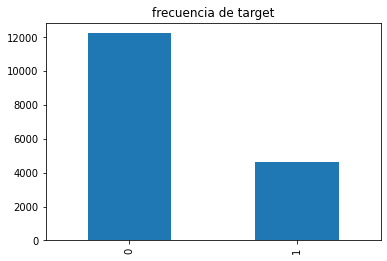

In [ ]:
#Plot de frecuencia
datasetUNO_Ant.value_counts().plot(kind='bar', title='frecuencia de target')

# Parte 2
Realice un análisis de correlación de a pares de columnas utilizando las variables B, C, M, N, Q, S y Antecedentes. ¿Encuentra algo que le llame la atención?*

In [ ]:
#Creamos nuevo dataset con ese conjunto de features.
datasetDOS = dataset[['B','C','M','Q','S','Antecedentes']].copy()
datasetDOS

,B,C,M,Q,S,Antecedentes
0,10,50257.0,3,0.0,7.25,1
1,10,29014.0,1,0.0,11.66,1
2,7,92.0,3,0.0,86.97,1
3,16,50269.0,3,0.0,2.51,1
4,8,8180.0,1,0.0,25.96,1
...,...,...,...,...,...,...
16842,3,63302.0,1,0.0,85.73,1
16843,12,825.0,1,0.0,12.50,1
16844,3,81067.0,1,0.0,24.16,1
16845,9,398372.0,2,0.0,29.00,1


In [ ]:
# Identificamos las variables del data frame y sus caracteristicas
datasetDOS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16847 entries, 0 to 16846
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   B             16847 non-null  int64  
 1   C             13652 non-null  float64
 2   M             16847 non-null  int64  
 3   Q             16847 non-null  float64
 4   S             16847 non-null  float64
 5   Antecedentes  16847 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 789.8 KB


In [ ]:
#valores de media, mediana, desviación, entre otros para las columnas numéricas
datasetDOS.describe()

,B,C,M,Q,S,Antecedentes
count,16847.000000,13652.000000,16847.000000,16847.000000,16847.000000,16847.000000
mean,7.654953,39189.982713,1.544548,8.451426,29.160839,0.273699
std,4.683369,90877.881158,1.023014,74.437965,26.519063,0.445869
min,-1.000000,0.000000,1.000000,0.000000,-1.000000,0.000000
25%,4.000000,1171.750000,1.000000,0.000000,9.600000,0.000000
50%,7.000000,6171.500000,1.000000,0.000000,20.660000,0.000000
75%,11.000000,26897.500000,2.000000,0.000000,39.235000,1.000000
max,20.000000,617324.000000,13.000000,2274.670000,99.970000,1.000000


In [ ]:
# Porcentaje de valores nulos
datasetDOS.isnull().mean()

B               0.000000
C               0.189648
M               0.000000
Q               0.000000
S               0.000000
Antecedentes    0.000000
dtype: float64

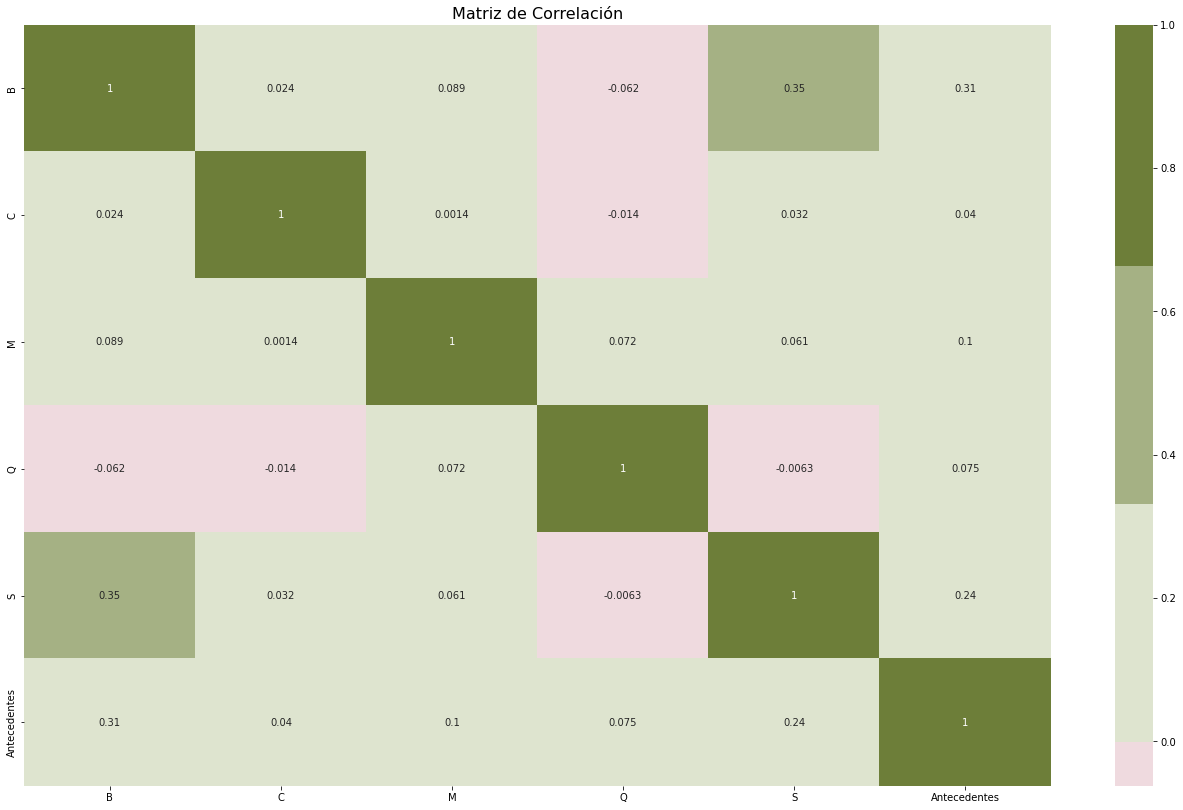

In [ ]:
# Matriz de correlación
plt.figure(figsize = (23, 14))
cmap = sns.diverging_palette(0, 100, sep = 20)
sns.heatmap(datasetDOS.corr(), annot = True, cmap = cmap, center = 0).set_title("Matriz de Correlación", fontsize = 16)
plt.show()

A partir de esta matriz podemos afirmar que no hay ninguna variable que esté altamente correlacionada (valor mayor a 0,7) con la variable target (Antecedentes). Podemos ver que hay variables como C y Q que tienen valores de correlación menores a 0.1, o sea, no aportan casi nada de información. Dichas variables pueden eliminarse del dataset original. Una observación es que todas las correlaciones entre este conjunto de variables es positiva.

También podemos afirmar que no hay ninguna variable que esté altamente relacionada entre sí. La mayor correlación que se tiene es entre las variables B y S, con un valor de 0.35

# Parte 3
¿Qué columnas (letras de la A a la S) correlacionan mejor con Antecedentes?

In [ ]:
#Creamos nuevo dataset con ese conjunto de features.
datasetTRES = dataset[['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','Antecedentes']].copy()
datasetTRES

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,Antecedentes
0,0,10,50257.0,0,0,0.000,0.0,0,0,MX,0.80,0,3,1,0,5,0.0,0.0,7.25,1
1,0,10,29014.0,0,0,0.000,0.0,0,0,MX,NaN,0,1,1,0,3,0.0,0.0,11.66,1
2,0,7,92.0,0,1,0.000,0.0,0,1,MX,NaN,0,3,1,0,2,0.0,0.0,86.97,1
3,9,16,50269.0,0,0,0.000,0.0,0,0,MX,0.91,0,3,1,0,5,0.0,0.0,2.51,1
4,0,8,8180.0,0,0,0.000,0.0,0,0,MX,NaN,0,1,1,0,1,0.0,0.0,25.96,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16842,0,3,63302.0,0,1,0.500,0.0,0,0,AR,NaN,1,1,1,0,1,0.0,0.0,85.73,1
16843,0,12,825.0,0,0,0.000,0.0,0,0,AR,NaN,1,1,1,0,5,0.0,0.0,12.50,1
16844,1,3,81067.0,0,0,0.000,0.0,0,0,AR,0.72,0,1,1,0,1,0.0,0.0,24.16,1
16845,0,9,398372.0,0,0,0.000,0.0,0,0,AR,NaN,0,2,1,0,1,0.0,0.0,29.00,1


Acá hay que hacer una aclaración importante. La matriz de correlación que hacemos, solo nos tomas las variables numéricas. Por lo tanto deberíamos hacer una transformación, a las variables categóricas. En este caso, sería la columna J como se puede ver a continuación que es de tipo object. 

In [ ]:
datasetTRES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16847 entries, 0 to 16846
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   A             16847 non-null  int64  
 1   B             16847 non-null  int64  
 2   C             13652 non-null  float64
 3   D             16847 non-null  int64  
 4   E             16847 non-null  int64  
 5   F             16847 non-null  float64
 6   G             16847 non-null  float64
 7   H             16847 non-null  int64  
 8   I             16847 non-null  int64  
 9   J             16847 non-null  object 
 10  K             4009 non-null   float64
 11  L             16847 non-null  int64  
 12  M             16847 non-null  int64  
 13  N             16847 non-null  int64  
 14  O             16847 non-null  int64  
 15  P             16847 non-null  int64  
 16  Q             16847 non-null  float64
 17  R             16847 non-null  float64
 18  S             16847 non-nu

In [ ]:
# Creación de variables dummies para cada variable categórica. 
# Al aplicar la funcion "get_dummies" estamos generando vectores one hot para cada categoria de las variables que son categoricas
datasetTRES_oneHotEncoding = pd.get_dummies(datasetTRES)
datasetTRES_oneHotEncoding 

,A,B,C,D,E,F,G,H,I,K,...,Q,R,S,Antecedentes,J_AR,J_BR,J_ES,J_MX,J_US,J_UY
0,0,10,50257.0,0,0,0.000,0.0,0,0,0.80,...,0.0,0.0,7.25,1,0,0,0,1,0,0
1,0,10,29014.0,0,0,0.000,0.0,0,0,NaN,...,0.0,0.0,11.66,1,0,0,0,1,0,0
2,0,7,92.0,0,1,0.000,0.0,0,1,NaN,...,0.0,0.0,86.97,1,0,0,0,1,0,0
3,9,16,50269.0,0,0,0.000,0.0,0,0,0.91,...,0.0,0.0,2.51,1,0,0,0,1,0,0
4,0,8,8180.0,0,0,0.000,0.0,0,0,NaN,...,0.0,0.0,25.96,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16842,0,3,63302.0,0,1,0.500,0.0,0,0,NaN,...,0.0,0.0,85.73,1,1,0,0,0,0,0
16843,0,12,825.0,0,0,0.000,0.0,0,0,NaN,...,0.0,0.0,12.50,1,1,0,0,0,0,0
16844,1,3,81067.0,0,0,0.000,0.0,0,0,0.72,...,0.0,0.0,24.16,1,1,0,0,0,0,0
16845,0,9,398372.0,0,0,0.000,0.0,0,0,NaN,...,0.0,0.0,29.00,1,1,0,0,0,0,0


In [ ]:
datasetTRES_oneHotEncoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16847 entries, 0 to 16846
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   A             16847 non-null  int64  
 1   B             16847 non-null  int64  
 2   C             13652 non-null  float64
 3   D             16847 non-null  int64  
 4   E             16847 non-null  int64  
 5   F             16847 non-null  float64
 6   G             16847 non-null  float64
 7   H             16847 non-null  int64  
 8   I             16847 non-null  int64  
 9   K             4009 non-null   float64
 10  L             16847 non-null  int64  
 11  M             16847 non-null  int64  
 12  N             16847 non-null  int64  
 13  O             16847 non-null  int64  
 14  P             16847 non-null  int64  
 15  Q             16847 non-null  float64
 16  R             16847 non-null  float64
 17  S             16847 non-null  float64
 18  Antecedentes  16847 non-nu

Ahora que tenemos nuestro dataset con todo variables numéricas, procedemos a realizar la matriz de correlación.

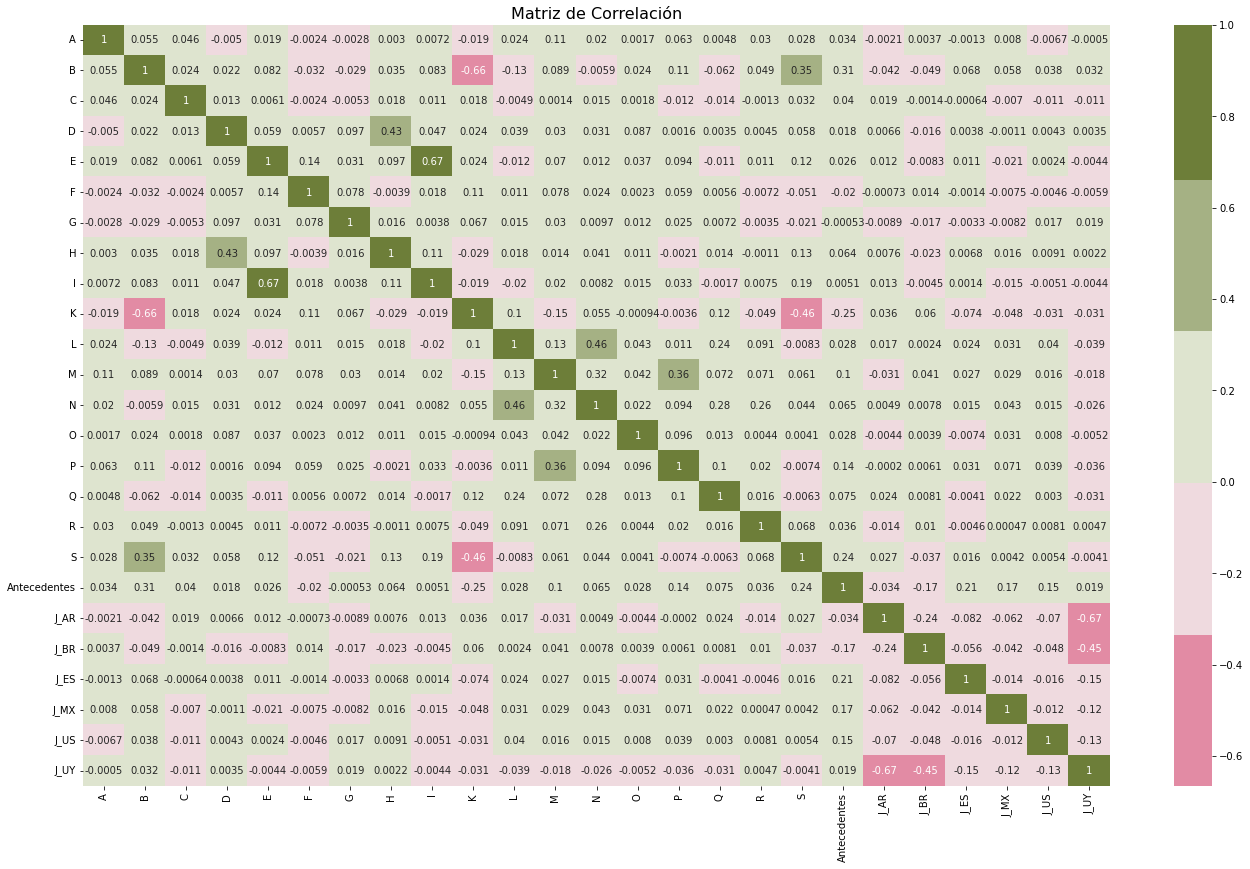

In [ ]:
# Matriz de correlación
plt.figure(figsize = (23, 14))
cmap = sns.diverging_palette(0, 100, sep = 20)
sns.heatmap(datasetTRES_oneHotEncoding.corr(), annot = True, cmap = cmap, center = 0).set_title("Matriz de Correlación", fontsize = 16)
plt.show()

Las mejores columnas (que tienen mejor correlación con la variable target) serían las columnas: B, K y S. Son las que tienen una mejor correlación. 

Ahora si hablamos de la variable categórica que pasamos a numérica. Cuando J es "ES" se tiene un valor de correlación de 0,21. Luego con BR y MX se tiene de -0,17 y 0,17 respectivamente. Para finalizar J_US con 0,15

# Parte 4 y 5
*   ¿Qué más nos puede decir sobre el dataset? 
*   Realice todos los cambios que entienda necesario en el dataset para tratar de que los algoritmos logren mejor performance.





En esta parte trabajaremos con el dataset original, procederemos a realizar un EDA y después se registrara todo lo que se obtuvo en base a esto

In [ ]:
dataset.isnull().mean()

A               0.000000
B               0.000000
C               0.189648
D               0.000000
E               0.000000
F               0.000000
G               0.000000
H               0.000000
I               0.000000
J               0.000000
K               0.762035
L               0.000000
M               0.000000
N               0.000000
O               0.000000
P               0.000000
Q               0.000000
R               0.000000
S               0.000000
T               0.000000
Antecedentes    0.000000
dtype: float64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16847 entries, 0 to 16846
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   A             16847 non-null  int64  
 1   B             16847 non-null  int64  
 2   C             13652 non-null  float64
 3   D             16847 non-null  int64  
 4   E             16847 non-null  int64  
 5   F             16847 non-null  float64
 6   G             16847 non-null  float64
 7   H             16847 non-null  int64  
 8   I             16847 non-null  int64  
 9   J             16847 non-null  object 
 10  K             4009 non-null   float64
 11  L             16847 non-null  int64  
 12  M             16847 non-null  int64  
 13  N             16847 non-null  int64  
 14  O             16847 non-null  int64  
 15  P             16847 non-null  int64  
 16  Q             16847 non-null  float64
 17  R             16847 non-null  float64
 18  S             16847 non-nu

Sabemos que tenemos una variable categórica. La transformaremos a numérica utilizando One Hot Encoding

In [ ]:
dataset = pd.get_dummies(dataset)
dataset

,A,B,C,D,E,F,G,H,I,K,...,R,S,T,Antecedentes,J_AR,J_BR,J_ES,J_MX,J_US,J_UY
0,0,10,50257.0,0,0,0.000,0.0,0,0,0.80,...,0.0,7.25,37.51,1,0,0,0,1,0,0
1,0,10,29014.0,0,0,0.000,0.0,0,0,NaN,...,0.0,11.66,8.18,1,0,0,0,1,0,0
2,0,7,92.0,0,1,0.000,0.0,0,1,NaN,...,0.0,86.97,13.96,1,0,0,0,1,0,0
3,9,16,50269.0,0,0,0.000,0.0,0,0,0.91,...,0.0,2.51,93.67,1,0,0,0,1,0,0
4,0,8,8180.0,0,0,0.000,0.0,0,0,NaN,...,0.0,25.96,135.40,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16842,0,3,63302.0,0,1,0.500,0.0,0,0,NaN,...,0.0,85.73,132.17,1,1,0,0,0,0,0
16843,0,12,825.0,0,0,0.000,0.0,0,0,NaN,...,0.0,12.50,26.34,1,1,0,0,0,0,0
16844,1,3,81067.0,0,0,0.000,0.0,0,0,0.72,...,0.0,24.16,195.63,1,1,0,0,0,0,0
16845,0,9,398372.0,0,0,0.000,0.0,0,0,NaN,...,0.0,29.00,36.97,1,1,0,0,0,0,0


## Análisis univariado y bivariado

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
A,16847.0,0.309847,1.095049,0.00,0.000,0.00,0.000,30.00
B,16847.0,7.654953,4.683369,-1.00,4.000,7.00,11.000,20.00
C,13652.0,39189.982713,90877.881158,0.00,1171.750,6171.50,26897.500,617324.00
D,16847.0,0.198492,2.044678,0.00,0.000,0.00,0.000,180.00
E,16847.0,0.434261,1.538438,0.00,0.000,0.00,0.000,45.00
F,16847.0,0.015849,0.098533,0.00,0.000,0.00,0.000,1.00
G,16847.0,0.005209,0.059477,0.00,0.000,0.00,0.000,1.00
H,16847.0,0.050395,0.531575,0.00,0.000,0.00,0.000,21.00
I,16847.0,0.144358,0.825544,0.00,0.000,0.00,0.000,24.00
K,4009.0,0.681901,0.153276,0.12,0.580,0.68,0.800,0.99


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e81de0fd0>,
      dtype=object)

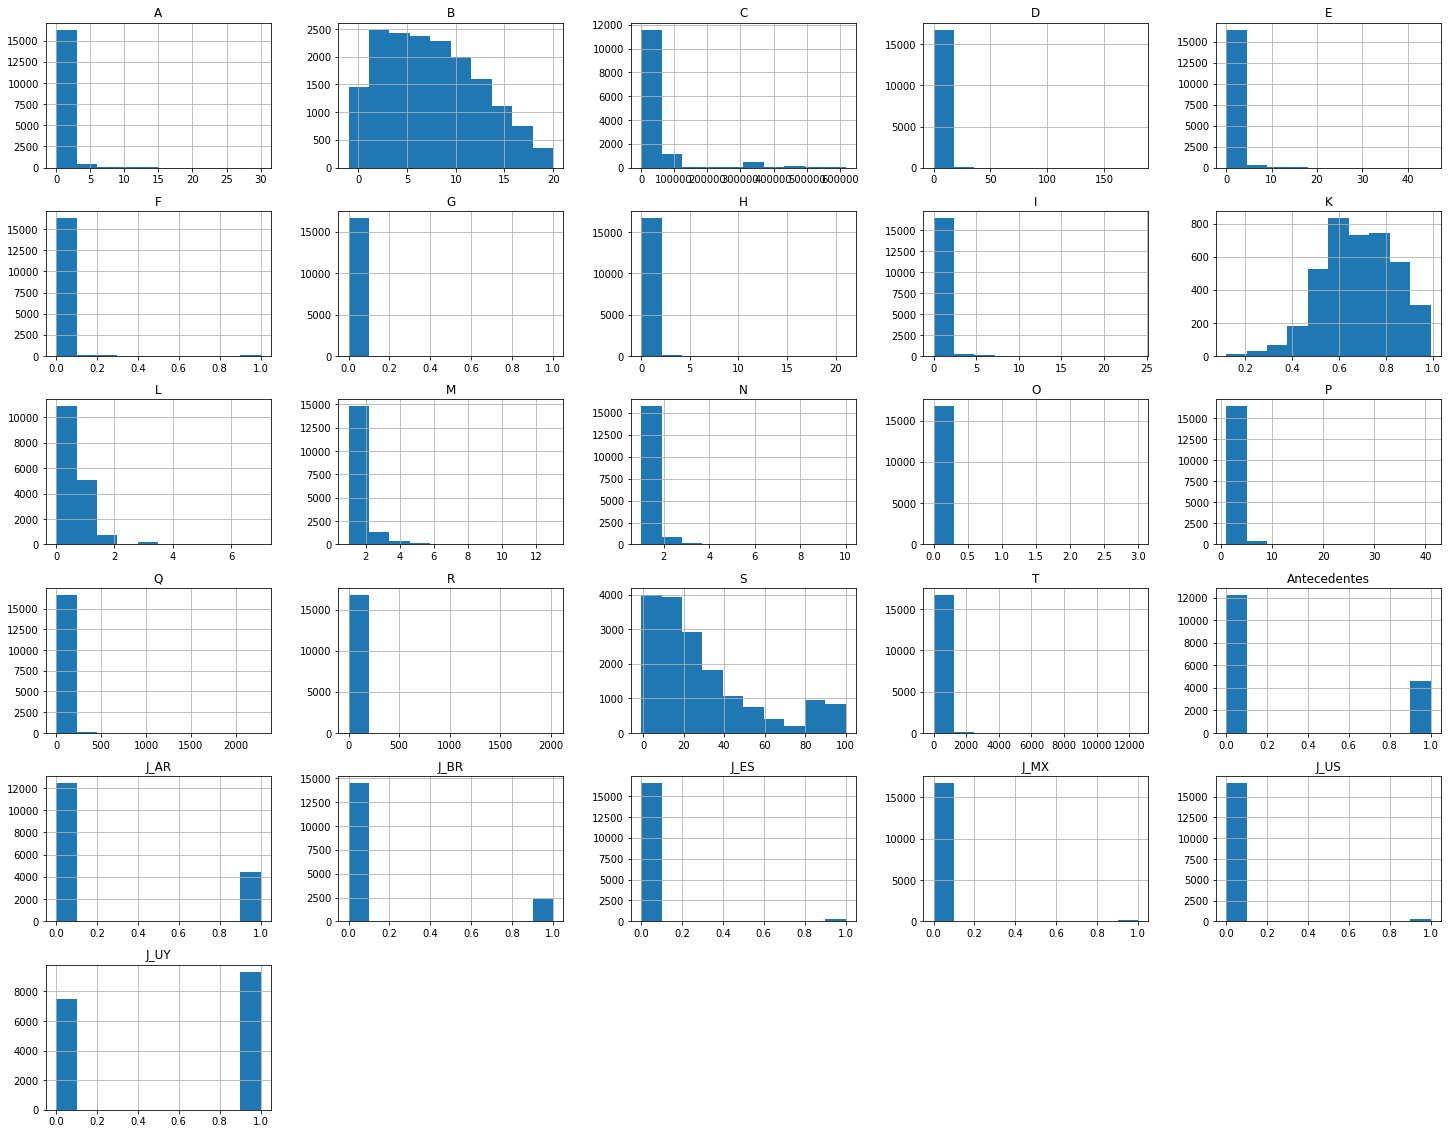

In [ ]:
dataset.hist(figsize=(25, 20))

Gracias a estos histogramas ya podemos ver que las siguientes variables, tienen outliers: A, C, D, E, F, G, H, I, K, L, M, N, O, P, Q, R, S y T.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seab

<Figure size 1440x1800 with 0 Axes>

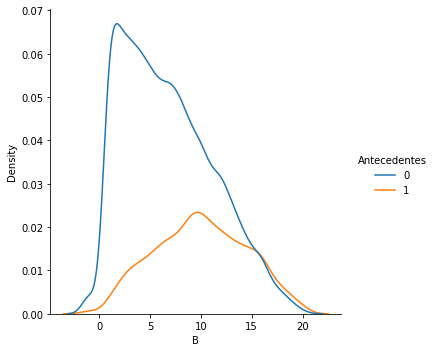

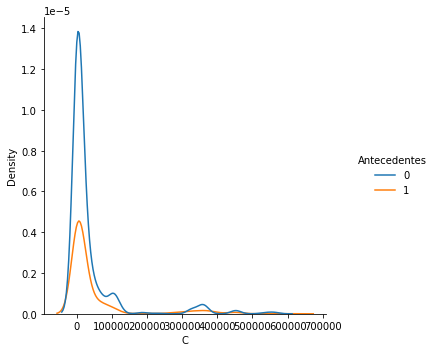

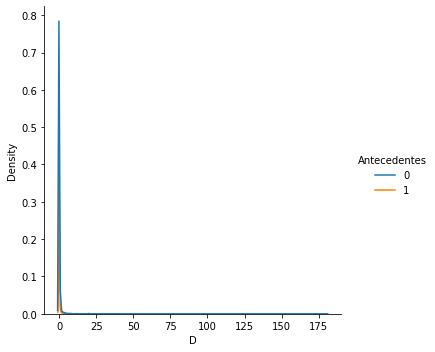

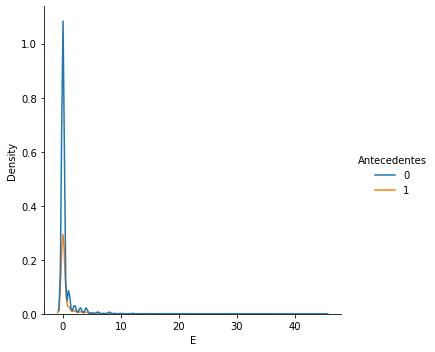

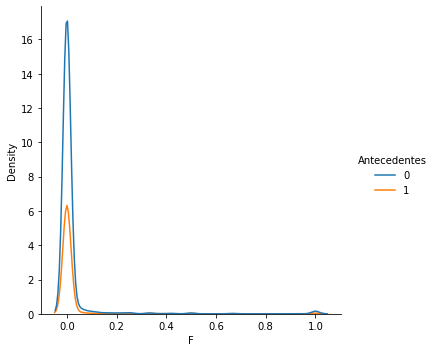

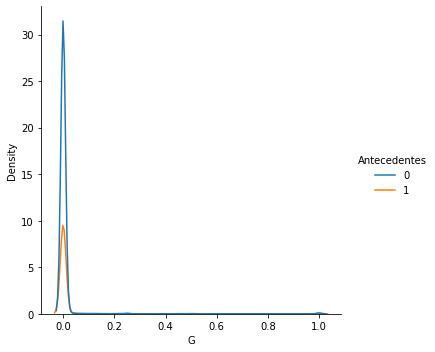

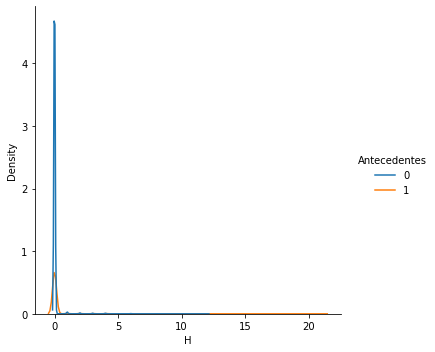

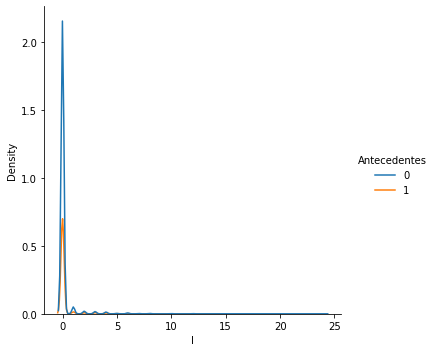

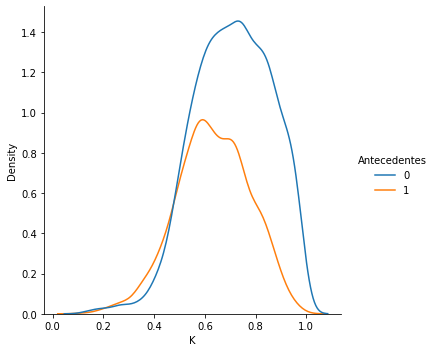

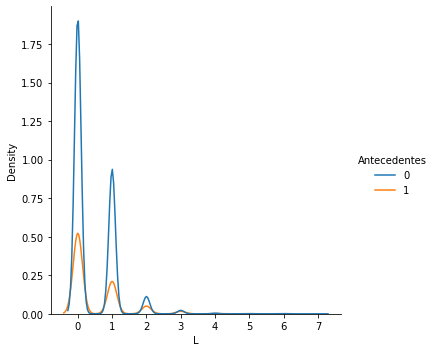

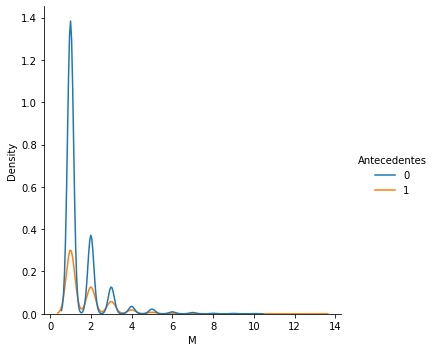

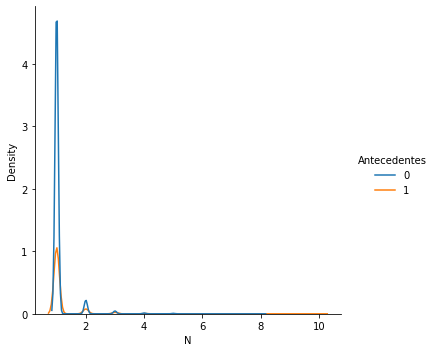

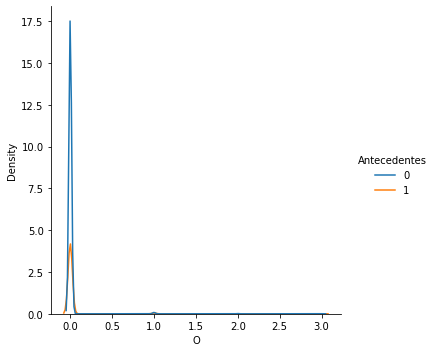

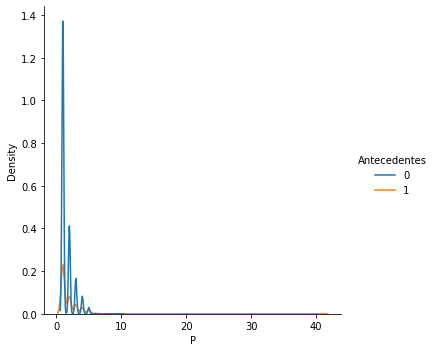

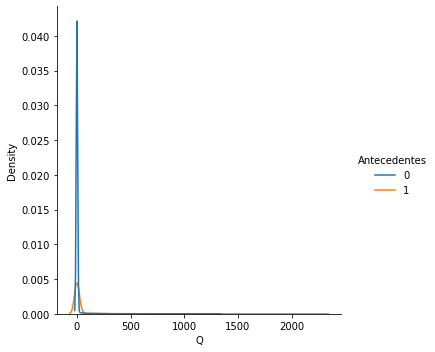

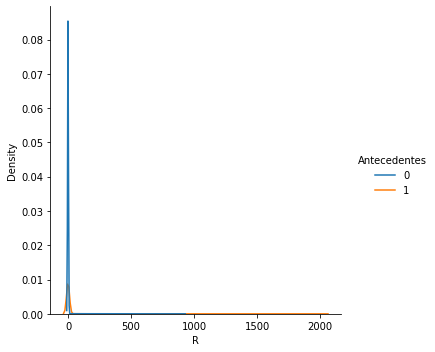

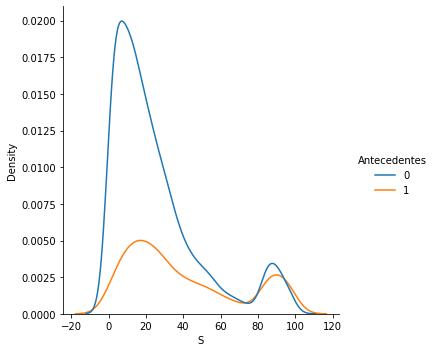

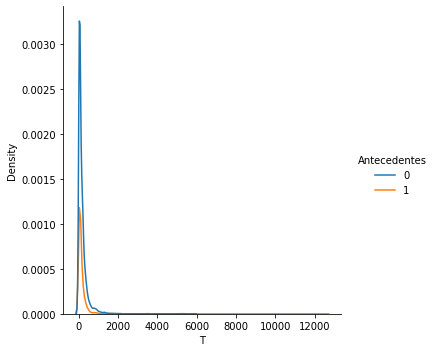

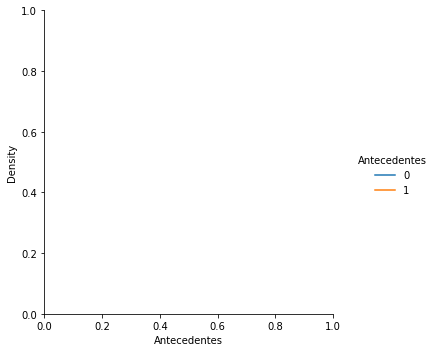

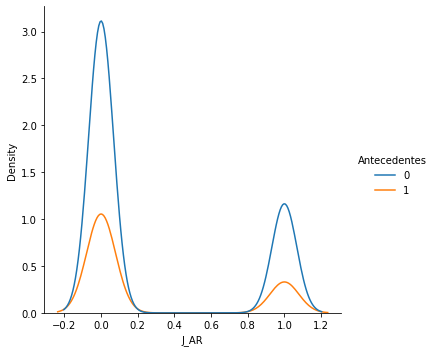

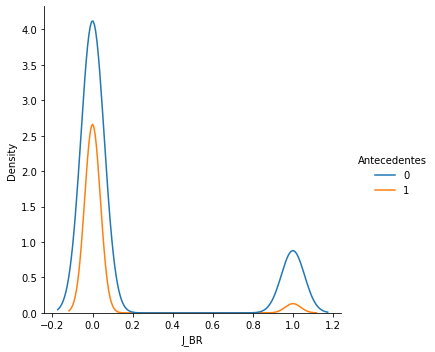

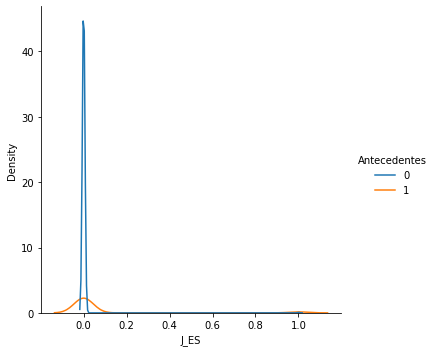

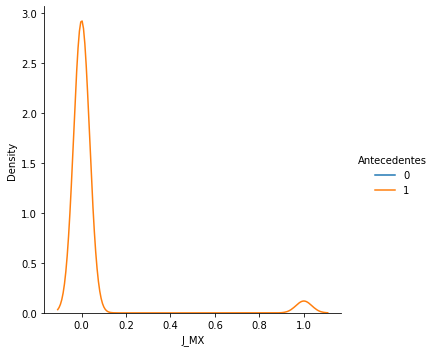

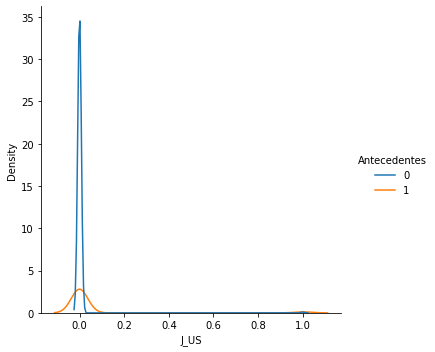

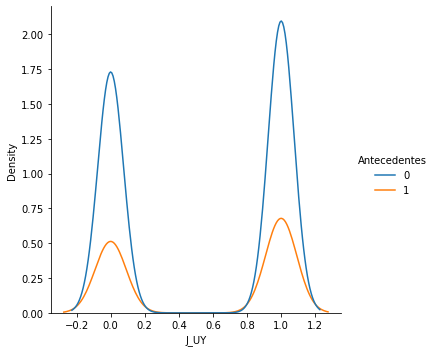

In [ ]:
#Analisis bivariado de todas las variables frente al target
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20, 25))
for i in dataset.columns[1:26]:
    sns.displot(data=dataset, x=i, hue="Antecedentes",kind="kde")
plt.show()

Del análisis bivariado se desprende que las variables más importantes son aquellas que reflejen un comportamiento diferente con respecto a los distintos valores de la variable Target (en nuestro caso un comportamiento diferente respecto al 0 y respecto al 1).

Al ver las siguientes gráficas podemos deducir que B, K y S nos aportarán muchisima información. Por otra parte J_US, J_ES, J_BR también nos aportarán información en determinados segmentos. Las demás variables que no se nombraron aportan poca o casi nada de información. 

## Outliers


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

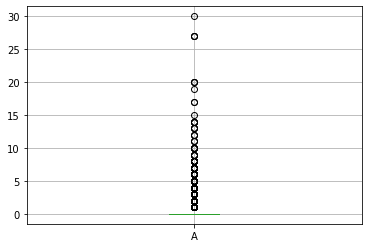

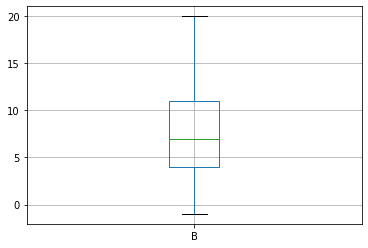

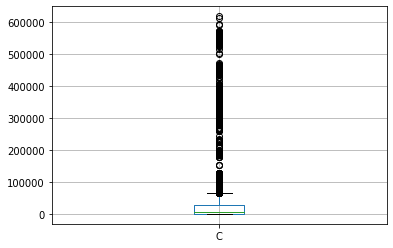

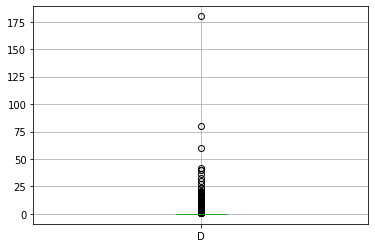

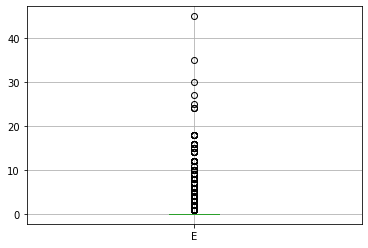

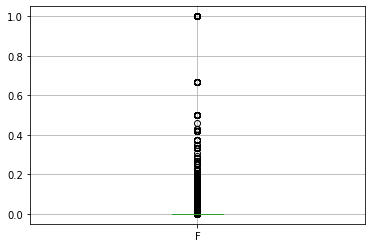

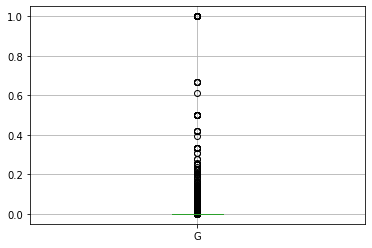

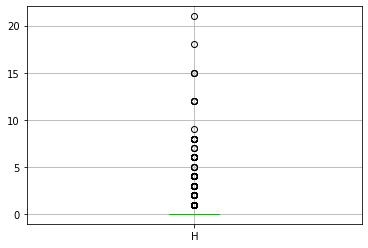

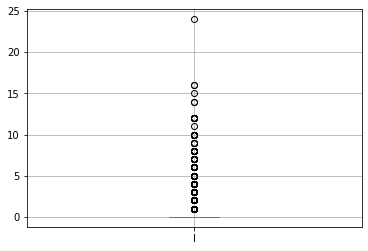

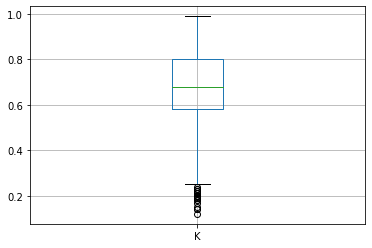

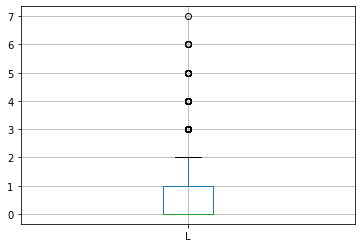

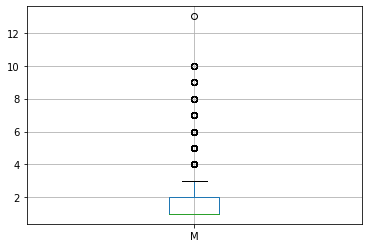

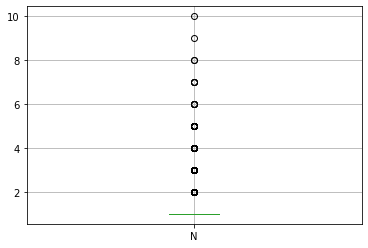

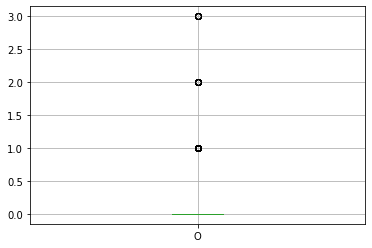

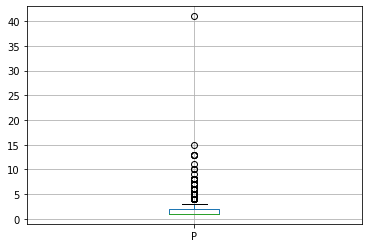

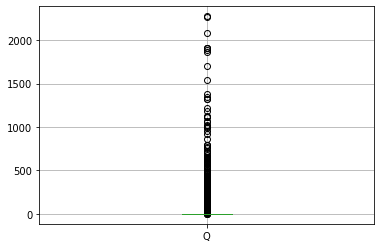

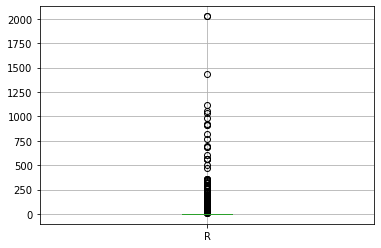

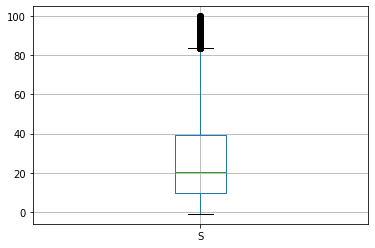

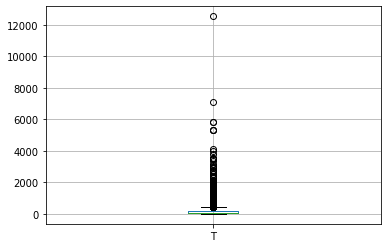

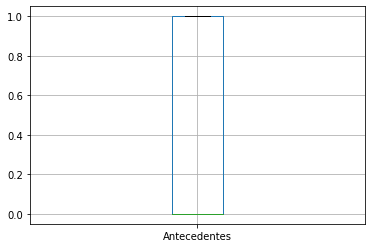

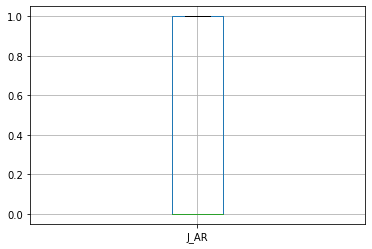

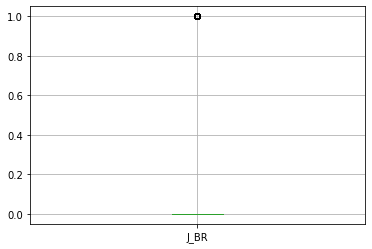

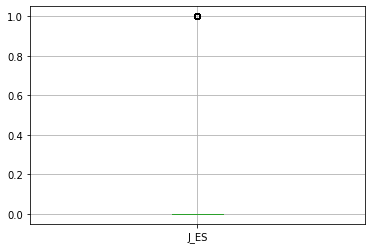

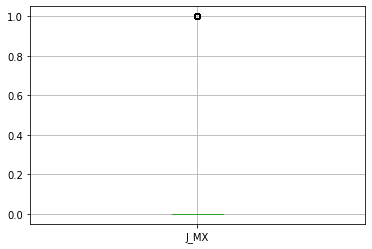

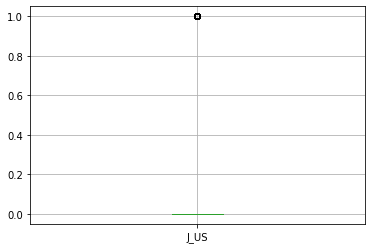

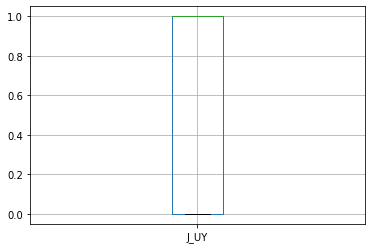

In [ ]:
for column in dataset:
    plt.figure()
    dataset.boxplot([column])

Al graficar los boxplots de cada variable, podemos ver que todos presentan outliers a excepción de la columna "B". La descomposición de la variable categórica "J" no la contaremos para este analisis, porque tiene valores binarios. 

In [ ]:
 #borramos los outliers de las variables que consideramos más convenientes
 #Aquellas cuyo recorrido vaya de 0 a 1, no las tocaremos. 
 #Aquellas variables cuyos valores tomaban mayoritariamente cero se dejaron algunos valores atipicos cercanos a estos, por poco
 dataset["A"] = winsorize(dataset["A"], limits=[None, 0.01])
 dataset["C"] = winsorize(dataset["C"], limits=[None, 0.24])
 dataset["D"] = winsorize(dataset["D"], limits=[None, 0.01])
 dataset["E"] = winsorize(dataset["E"], limits=[None, 0.01])
 dataset["H"] = winsorize(dataset["H"], limits=[None, 0.01])
 dataset["I"] = winsorize(dataset["I"], limits=[None, 0.005])
 dataset["K"] = winsorize(dataset["K"], limits = [0.0015, None])
 dataset["L"] = winsorize(dataset["L"], limits = [None, 0.02])
 dataset["M"] = winsorize(dataset["M"], limits = [None, 0.05])
 dataset["N"] = winsorize(dataset["N"], limits = [None, 0.01])
 dataset["O"] = winsorize(dataset["O"], limits = [None, 0.001])
 dataset["P"] = winsorize(dataset["P"], limits = [None, 0.08])
 dataset["Q"] = winsorize(dataset["Q"], limits = [None, 0.038])
 dataset["R"] = winsorize(dataset["R"], limits = [None, 0.0078])
 dataset["S"] = winsorize(dataset["S"], limits=[None, 0.1])
 dataset["T"] = winsorize(dataset["T"], limits = [None, 0.073])




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

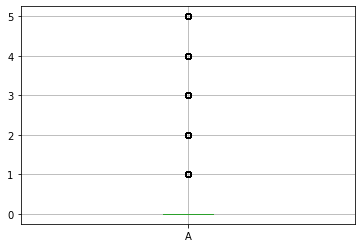

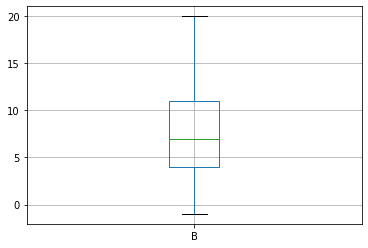

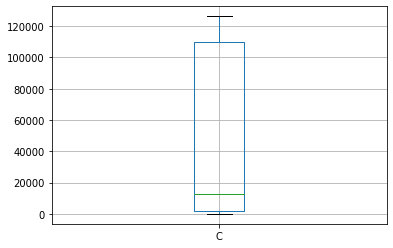

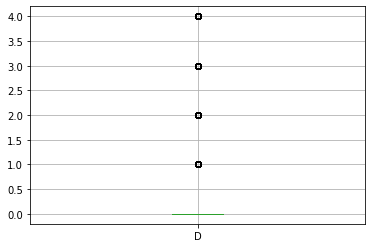

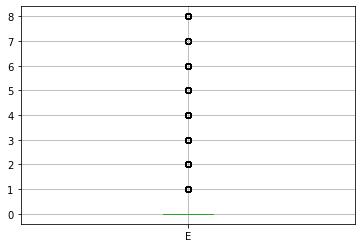

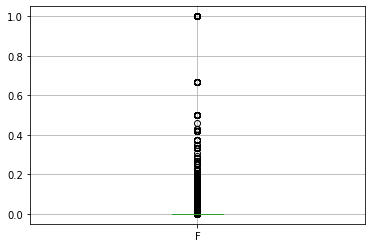

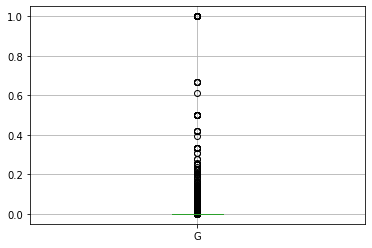

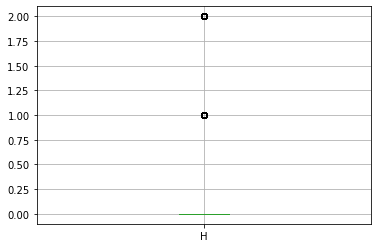

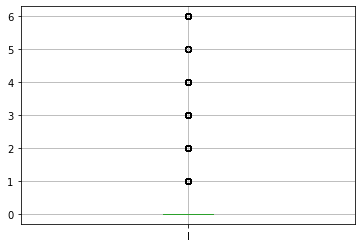

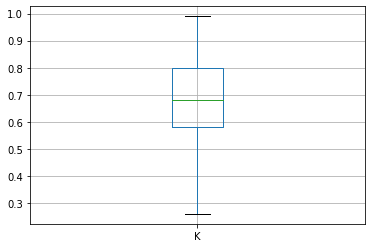

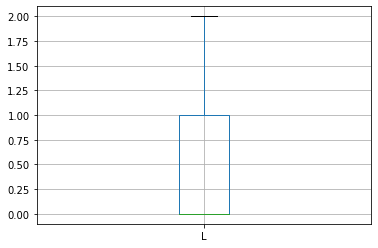

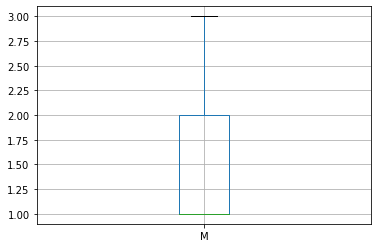

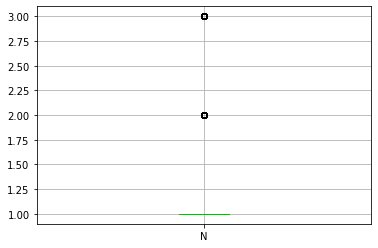

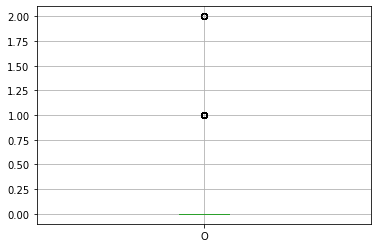

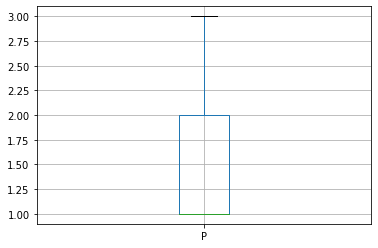

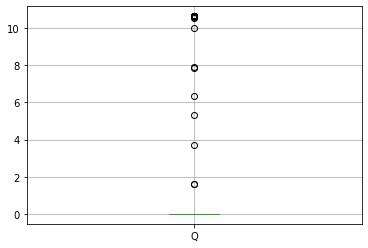

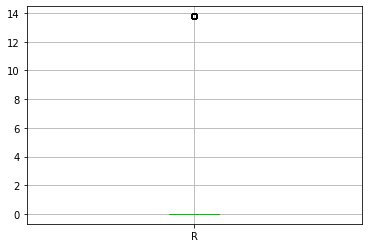

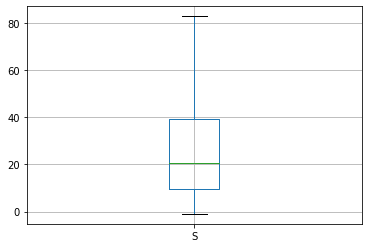

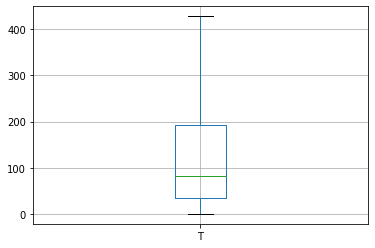

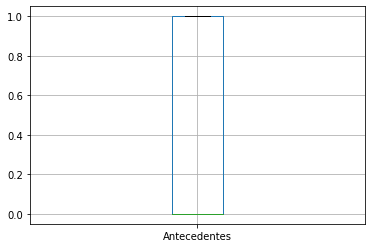

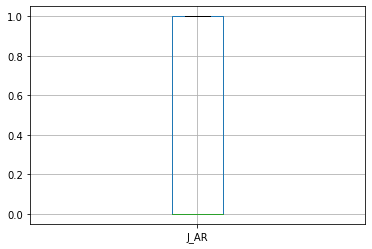

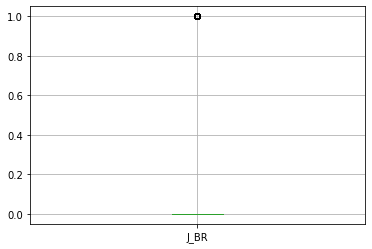

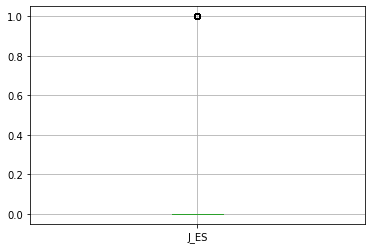

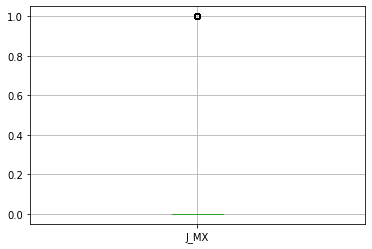

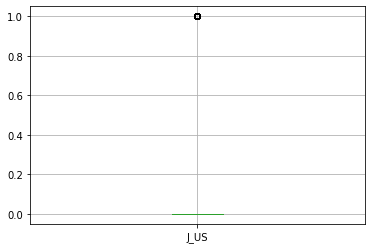

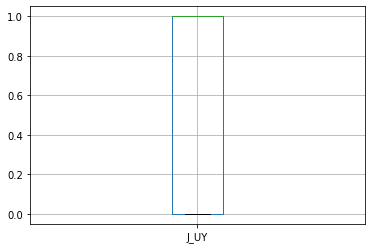

In [ ]:
#Graficamos boxplots nuevamente
for column in dataset:
    plt.figure()
    dataset.boxplot([column])

## Valores inconsistentes y que no aplican valor

In [ ]:
# Duplicados
print(dataset.duplicated(keep='first').value_counts(), "\n")

False    16845
True         2
dtype: int64 



In [ ]:
datasetDuplicados = dataset[dataset.duplicated(keep='first')]
len(datasetDuplicados)

2

In [ ]:
#Eliminamos los duplicados y nos aseguramos que ya no haya duplicados imprimiendo
dataset.drop(datasetDuplicados.index, axis=0, inplace=True)
print(dataset.duplicated(keep='first').value_counts(), "\n")

False    16845
dtype: int64 



## Valores nulos

In [ ]:
dataset.isnull().mean()

A               0.000000
B               0.000000
C               0.000000
D               0.000000
E               0.000000
F               0.000000
G               0.000000
H               0.000000
I               0.000000
K               0.762066
L               0.000000
M               0.000000
N               0.000000
O               0.000000
P               0.000000
Q               0.000000
R               0.000000
S               0.000000
T               0.000000
Antecedentes    0.000000
J_AR            0.000000
J_BR            0.000000
J_ES            0.000000
J_MX            0.000000
J_US            0.000000
J_UY            0.000000
dtype: float64

Podemos ver que ahora solo tenemos valores nulos en la columna K y son bastantes, procederemos a analizar que hacer con dichos valores nulos

In [ ]:
# media
dataset["K"].mean()

0.6823627744510977

In [ ]:
# mediana
dataset["K"].median()

0.68

Podemos ver que el valor del promedio y la mediana es practicamente identico, probaremos utilizando la mediana porque es un valor "más lindo" y veremos como queda la distribución ANTES y DESPUÉS

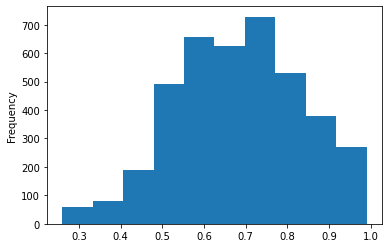

In [ ]:
#Antes de cambiar valores nulos
dataset["K"].plot.hist()

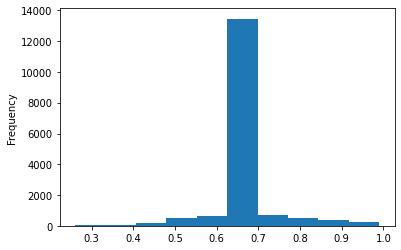

In [ ]:
#Luego de cambiar valores nulos por la mediana
datasetPruebaNulosMediana = dataset.copy()
datasetPruebaNulosMediana['K'] = dataset['K'].fillna(dataset['K'].median())
datasetPruebaNulosMediana["K"].plot.hist()

Podemos ver, que la distribución cambia demasiado, las opciones que tenemos es utilizar un bfill o ffill, o sino borrar los nulos directamente. Probaremos con bfill. 

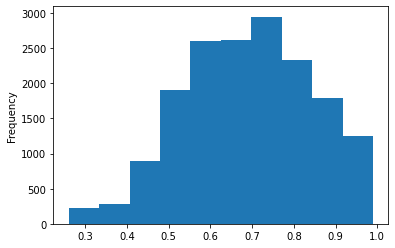

In [ ]:
datasetPruebaNulosBfill = dataset.copy()
datasetPruebaNulosBfill["K"] = dataset["K"].fillna(method = "bfill")
datasetPruebaNulosBfill["K"].plot.hist()

Ahora tenemos una distribución más parecida a la original. Procedemos a probar con ffill y luego eliminando los nulos

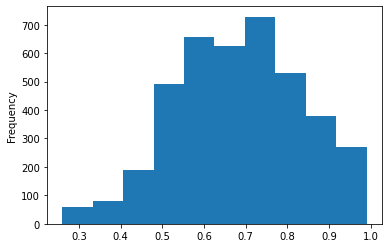

In [ ]:
datasetPruebaNulosBorrados = dataset.copy()
datasetPruebaNulosBorrados["K"] = dataset["K"].dropna(how='any',axis=0) 
datasetPruebaNulosBorrados["K"].plot.hist()

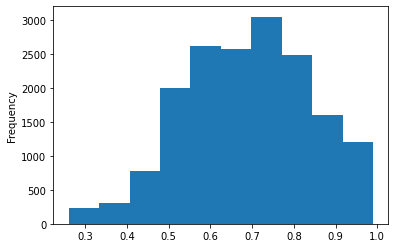

In [ ]:
datasetPruebaNulosFfill = dataset.copy()
datasetPruebaNulosFfill["K"] = dataset["K"].fillna(method = "ffill")
datasetPruebaNulosFfill["K"].plot.hist()

Al final, las que considero más parecidas a la distribución original son la grafica de Ffill y la de eliminación de nulos. Como K es una variable que nos brinda bastante información del target, prefiero no eliminar los nulos y quedarme con Ffill. 

In [ ]:
dataset["K"] = dataset["K"].fillna(method = "ffill")
dataset.isnull().mean()

A               0.0
B               0.0
C               0.0
D               0.0
E               0.0
F               0.0
G               0.0
H               0.0
I               0.0
K               0.0
L               0.0
M               0.0
N               0.0
O               0.0
P               0.0
Q               0.0
R               0.0
S               0.0
T               0.0
Antecedentes    0.0
J_AR            0.0
J_BR            0.0
J_ES            0.0
J_MX            0.0
J_US            0.0
J_UY            0.0
dtype: float64

## Correlación


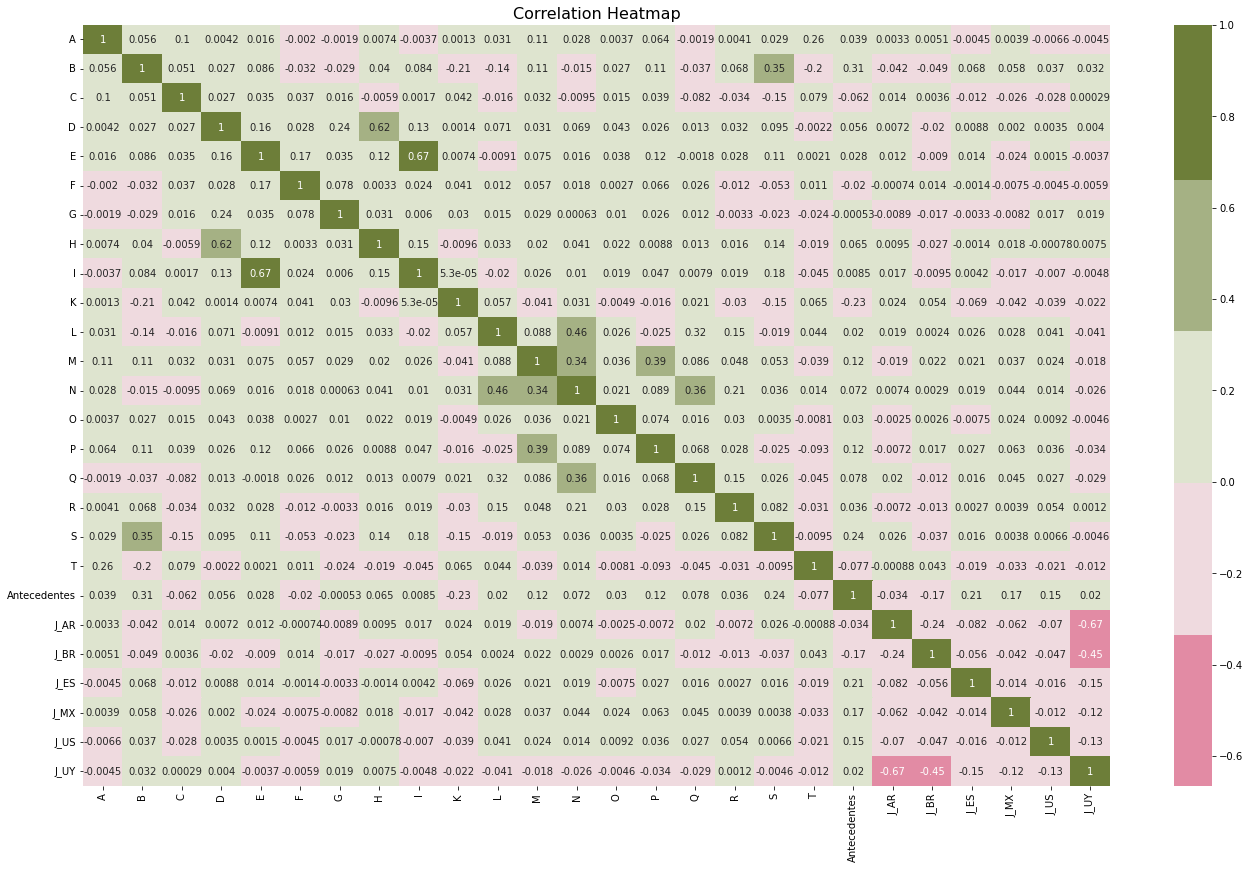

In [ ]:
plt.figure(figsize = (23, 14))
cmap = sns.diverging_palette(0, 100, sep = 20)
sns.heatmap(dataset.corr(), annot = True, cmap = cmap, center = 0).set_title("Correlation Heatmap", fontsize = 16)
plt.show()

Se puede observar que no tenemos ningún par de variable que estén correlacionadas. En nuestro caso una correlación alta es que sea mayor a 0.7. Podriamos decir que el par I-E tiene una correlación alta, pero esto se solucionará eliminando del dataset la columna I, puesto que tiene una correlació super baja, no aportará nada al algoritmo.

Otro par que tiene una correlación alta seria J_AR y J_UY con un valor de -0,67 pero no borraremos ninguna de las dos. En caso de borrar alguna, borrariamos J_UY ya que es la que tiene menos correlación con el target. 

Otra columna que vamos a eliminar será la columna G que también tiene una correlación bajisima.

In [ ]:
dataset.drop(['G'], axis = 1, inplace=True)
dataset.drop(['I'], axis = 1, inplace=True)
dataset

,A,B,C,D,E,F,H,K,L,M,...,R,S,T,Antecedentes,J_AR,J_BR,J_ES,J_MX,J_US,J_UY
0,0,10,50257.0,0,0,0.000,0,0.80,0,3,...,0.0,7.25,37.51,1,0,0,0,1,0,0
1,0,10,29014.0,0,0,0.000,0,0.80,0,1,...,0.0,11.66,8.18,1,0,0,0,1,0,0
2,0,7,92.0,0,1,0.000,0,0.80,0,3,...,0.0,83.00,13.96,1,0,0,0,1,0,0
3,5,16,50269.0,0,0,0.000,0,0.91,0,3,...,0.0,2.51,93.67,1,0,0,0,1,0,0
4,0,8,8180.0,0,0,0.000,0,0.91,0,1,...,0.0,25.96,135.40,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16842,0,3,63302.0,0,1,0.500,0,0.71,1,1,...,0.0,83.00,132.17,1,1,0,0,0,0,0
16843,0,12,825.0,0,0,0.000,0,0.71,1,1,...,0.0,12.50,26.34,1,1,0,0,0,0,0
16844,1,3,81067.0,0,0,0.000,0,0.72,0,1,...,0.0,24.16,195.63,1,1,0,0,0,0,0
16845,0,9,126315.0,0,0,0.000,0,0.72,0,2,...,0.0,29.00,36.97,1,1,0,0,0,0,0


## Feature Scaling
Al ver el dataset, podemos ver que hay columnas como C, S y T que no tienen una escala relativamente parecida a las demás variables. Por esta razón haremos una estandarización. 

Primero sacaremos la variable target del dataset, puesto que no queremos que esta valor sufra de cambios, ya que es binario (0 , 1). Lo guardaremos en una variable que se llamara "target" para usarlo al momento de entrenar nuestros modelos.

In [ ]:
datasetStandard = dataset.copy()
target = dataset["Antecedentes"]
datasetStandard = datasetStandard.drop("Antecedentes", axis = 1)
datasetStandard

,A,B,C,D,E,F,H,K,L,M,...,Q,R,S,T,J_AR,J_BR,J_ES,J_MX,J_US,J_UY
0,0,10,50257.0,0,0,0.000,0,0.80,0,3,...,0.0,0.0,7.25,37.51,0,0,0,1,0,0
1,0,10,29014.0,0,0,0.000,0,0.80,0,1,...,0.0,0.0,11.66,8.18,0,0,0,1,0,0
2,0,7,92.0,0,1,0.000,0,0.80,0,3,...,0.0,0.0,83.00,13.96,0,0,0,1,0,0
3,5,16,50269.0,0,0,0.000,0,0.91,0,3,...,0.0,0.0,2.51,93.67,0,0,0,1,0,0
4,0,8,8180.0,0,0,0.000,0,0.91,0,1,...,0.0,0.0,25.96,135.40,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16842,0,3,63302.0,0,1,0.500,0,0.71,1,1,...,0.0,0.0,83.00,132.17,1,0,0,0,0,0
16843,0,12,825.0,0,0,0.000,0,0.71,1,1,...,0.0,0.0,12.50,26.34,1,0,0,0,0,0
16844,1,3,81067.0,0,0,0.000,0,0.72,0,1,...,0.0,0.0,24.16,195.63,1,0,0,0,0,0
16845,0,9,126315.0,0,0,0.000,0,0.72,0,2,...,0.0,0.0,29.00,36.97,1,0,0,0,0,0


In [ ]:
#Se utiliza standardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(datasetStandard)

In [ ]:
datasetStandard = pd.DataFrame(scaled, columns = datasetStandard.columns)
datasetStandard

,A,B,C,D,E,F,H,K,L,M,...,Q,R,S,T,J_AR,J_BR,J_ES,J_MX,J_US,J_UY
0,-0.350298,0.501036,0.126942,-0.209942,-0.325531,-0.160866,-0.125453,0.739391,-0.692288,2.200425,...,-0.200272,-0.088871,-0.853152,-0.754376,-0.597167,-0.404139,-0.137821,9.622023,-0.117396,-1.1141
1,-0.350298,0.501036,-0.279938,-0.209942,-0.325531,-0.160866,-0.125453,0.739391,-0.692288,-0.641963,...,-0.200272,-0.088871,-0.675495,-0.986413,-0.597167,-0.404139,-0.137821,9.622023,-0.117396,-1.1141
2,-0.350298,-0.139649,-0.833899,-0.209942,0.481945,-0.160866,-0.125453,0.739391,-0.692288,2.200425,...,-0.200272,-0.088871,2.198438,-0.940686,-0.597167,-0.404139,-0.137821,9.622023,-0.117396,-1.1141
3,5.885986,1.782407,0.127172,-0.209942,-0.325531,-0.160866,-0.125453,1.465499,-0.692288,2.200425,...,-0.200272,-0.088871,-1.044102,-0.310078,-0.597167,-0.404139,-0.137821,9.622023,-0.117396,-1.1141
4,-0.350298,0.073913,-0.678985,-0.209942,-0.325531,-0.160866,-0.125453,1.465499,-0.692288,-0.641963,...,-0.200272,-0.088871,-0.099419,0.020060,-0.597167,-0.404139,-0.137821,9.622023,-0.117396,-1.1141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16840,-0.350298,-0.993895,0.376801,-0.209942,0.481945,4.913415,-0.125453,0.145304,0.978907,-0.641963,...,-0.200272,-0.088871,2.198438,-0.005494,1.674575,-0.404139,-0.137821,-0.103928,-0.117396,-1.1141
16841,-0.350298,0.928160,-0.819859,-0.209942,-0.325531,-0.160866,-0.125453,0.145304,0.978907,-0.641963,...,-0.200272,-0.088871,-0.641655,-0.842745,1.674575,-0.404139,-0.137821,-0.103928,-0.117396,-1.1141
16842,0.896959,-0.993895,0.717065,-0.209942,-0.325531,-0.160866,-0.125453,0.211313,-0.692288,-0.641963,...,-0.200272,-0.088871,-0.171932,0.496556,1.674575,-0.404139,-0.137821,-0.103928,-0.117396,-1.1141
16843,-0.350298,0.287475,1.583728,-0.209942,-0.325531,-0.160866,-0.125453,0.211313,-0.692288,0.779231,...,-0.200272,-0.088871,0.023047,-0.758648,1.674575,-0.404139,-0.137821,-0.103928,-0.117396,-1.1141


Procedemos a revisar que todo este bien luego de la estandarización

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

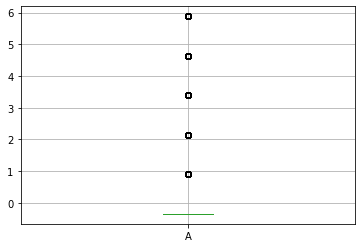

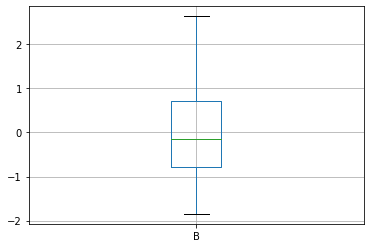

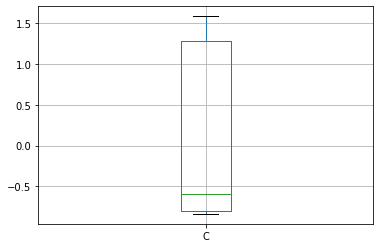

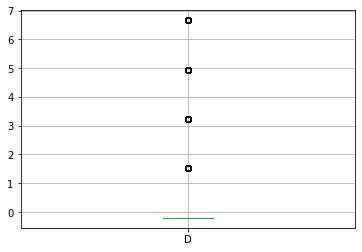

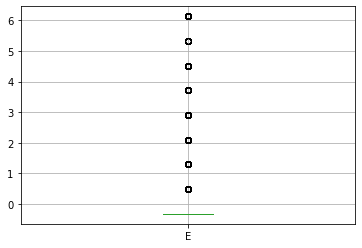

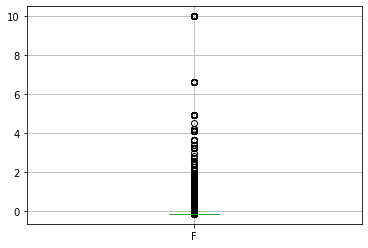

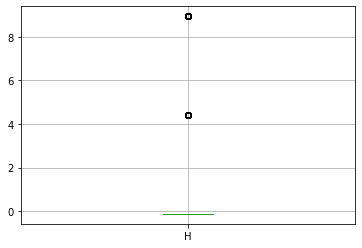

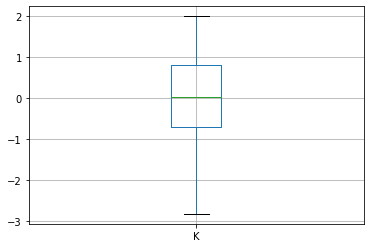

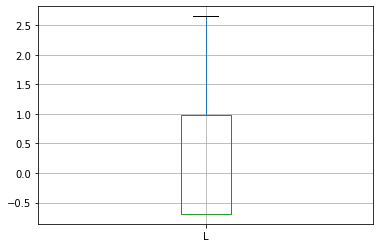

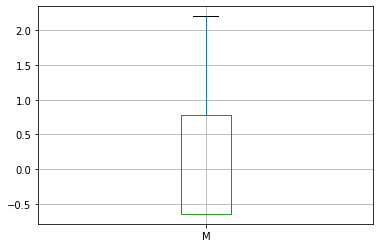

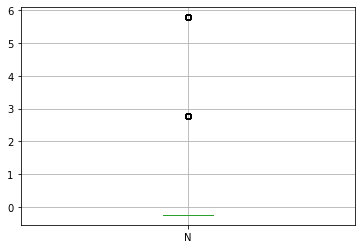

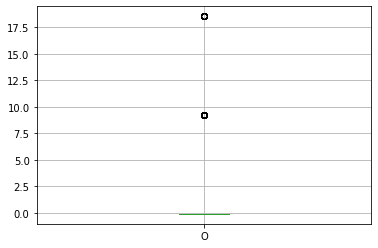

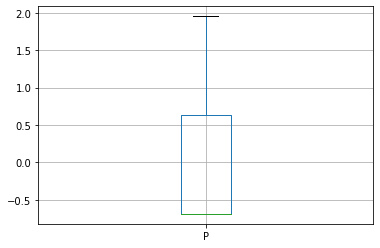

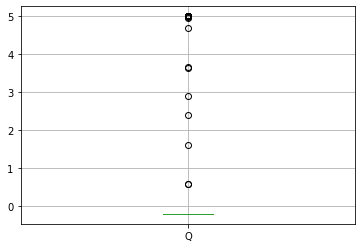

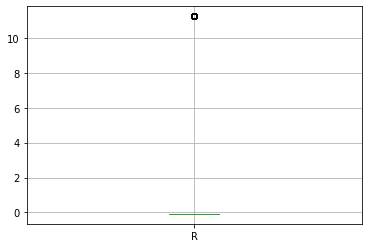

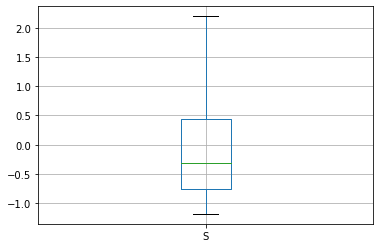

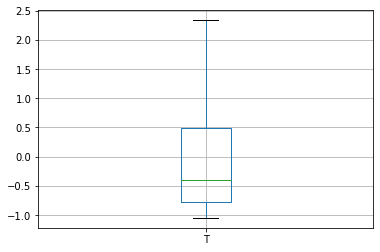

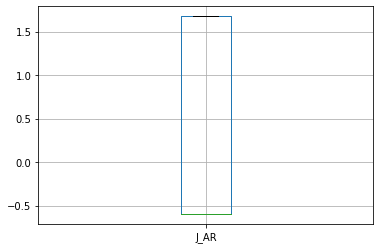

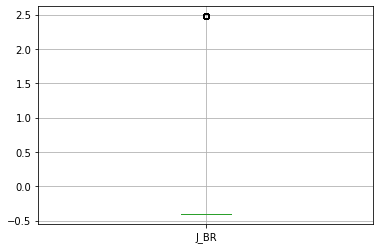

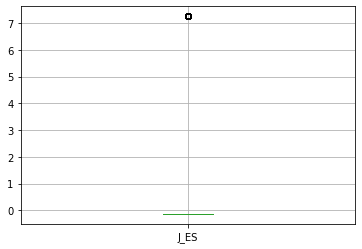

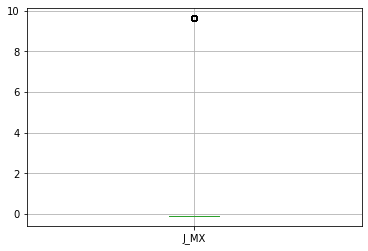

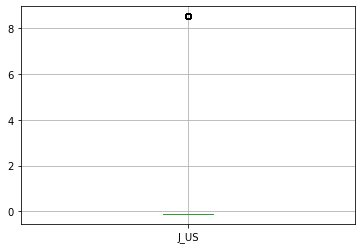

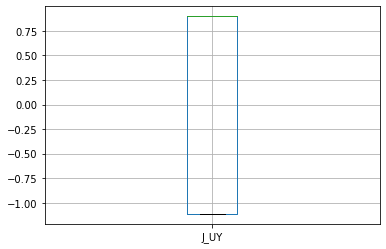

In [ ]:
for column in datasetStandard:
    plt.figure()
    datasetStandard.boxplot([column])

In [ ]:
# Duplicados
print(datasetStandard.duplicated(keep='first').value_counts(), "\n")

False    16845
dtype: int64 



In [ ]:
datasetStandard.isnull().mean()

A       0.0
B       0.0
C       0.0
D       0.0
E       0.0
F       0.0
H       0.0
K       0.0
L       0.0
M       0.0
N       0.0
O       0.0
P       0.0
Q       0.0
R       0.0
S       0.0
T       0.0
J_AR    0.0
J_BR    0.0
J_ES    0.0
J_MX    0.0
J_US    0.0
J_UY    0.0
dtype: float64

In [ ]:
dataset = datasetStandard

## Comentarios del dataset
*   Como se vio en el análisis univariado del target **el dataset no está desbalanceado**
*   Las variables B, K y S nos aportan mucha información sobre el target.
*   Se tienen más filas de países de Argentina, Uruguay y Brasil. Pero no se decidió quitar los demás paises por el hecho de que algunos tenían hasta una mejor correlación que los que hay mayor cantidad
*   Muchas variables tenían outliers
*   Solo había dos elementos repetidos
*   La variable K tenía muchos valores nulos.
*   Hubo que realizar una estandarización para dejar las features en la misma escala




## Resultados


*   dataset = contiene las features que nos ayudarán a predecir la variable target
*   target = contiene los valores de la variable antecedentes



In [ ]:
target

0        1
1        1
2        1
3        1
4        1
        ..
16842    1
16843    1
16844    1
16845    1
16846    1
Name: Antecedentes, Length: 16845, dtype: int64

In [ ]:
dataset

,A,B,C,D,E,F,H,K,L,M,...,Q,R,S,T,J_AR,J_BR,J_ES,J_MX,J_US,J_UY
0,-0.350298,0.501036,0.126942,-0.209942,-0.325531,-0.160866,-0.125453,0.739391,-0.692288,2.200425,...,-0.200272,-0.088871,-0.853152,-0.754376,-0.597167,-0.404139,-0.137821,9.622023,-0.117396,-1.1141
1,-0.350298,0.501036,-0.279938,-0.209942,-0.325531,-0.160866,-0.125453,0.739391,-0.692288,-0.641963,...,-0.200272,-0.088871,-0.675495,-0.986413,-0.597167,-0.404139,-0.137821,9.622023,-0.117396,-1.1141
2,-0.350298,-0.139649,-0.833899,-0.209942,0.481945,-0.160866,-0.125453,0.739391,-0.692288,2.200425,...,-0.200272,-0.088871,2.198438,-0.940686,-0.597167,-0.404139,-0.137821,9.622023,-0.117396,-1.1141
3,5.885986,1.782407,0.127172,-0.209942,-0.325531,-0.160866,-0.125453,1.465499,-0.692288,2.200425,...,-0.200272,-0.088871,-1.044102,-0.310078,-0.597167,-0.404139,-0.137821,9.622023,-0.117396,-1.1141
4,-0.350298,0.073913,-0.678985,-0.209942,-0.325531,-0.160866,-0.125453,1.465499,-0.692288,-0.641963,...,-0.200272,-0.088871,-0.099419,0.020060,-0.597167,-0.404139,-0.137821,9.622023,-0.117396,-1.1141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16840,-0.350298,-0.993895,0.376801,-0.209942,0.481945,4.913415,-0.125453,0.145304,0.978907,-0.641963,...,-0.200272,-0.088871,2.198438,-0.005494,1.674575,-0.404139,-0.137821,-0.103928,-0.117396,-1.1141
16841,-0.350298,0.928160,-0.819859,-0.209942,-0.325531,-0.160866,-0.125453,0.145304,0.978907,-0.641963,...,-0.200272,-0.088871,-0.641655,-0.842745,1.674575,-0.404139,-0.137821,-0.103928,-0.117396,-1.1141
16842,0.896959,-0.993895,0.717065,-0.209942,-0.325531,-0.160866,-0.125453,0.211313,-0.692288,-0.641963,...,-0.200272,-0.088871,-0.171932,0.496556,1.674575,-0.404139,-0.137821,-0.103928,-0.117396,-1.1141
16843,-0.350298,0.287475,1.583728,-0.209942,-0.325531,-0.160866,-0.125453,0.211313,-0.692288,0.779231,...,-0.200272,-0.088871,0.023047,-0.758648,1.674575,-0.404139,-0.137821,-0.103928,-0.117396,-1.1141


# Parte 6 
Entrene al menos cuatro algoritmos de machine learning con el fin de predecir si
una persona tiene antecedentes con alguna responsabilidad directa en algún tipo
de accidente de tránsito o no.

## Decision Trees

In [ ]:
from sklearn.model_selection import train_test_split
# Dividimos en train y test el target y el dataset
X_train, X_test, Y_train, Y_test = train_test_split(dataset, target, test_size=0.2, random_state=42)

In [ ]:
#Función para evaluar cada modelo
def evaluate(model, X_train, X_test, Y_train, Y_test):
    Y_test_pred = model.predict(X_test)
    Y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS:")
    print(f"ACCURACY SCORE:\n{accuracy_score(Y_train, Y_train_pred):.4f}")

    print("=============================== \nTESTING RESULTS:")
    print(f"ACCURACY SCORE:\n{accuracy_score(Y_test, Y_test_pred):.4f}")

Primero se probará con un árbol de decisión con hiper parámetros por defecto (no se pone ninguno) y se obtiene el siguiente resultado:

In [ ]:
#Función que crea el modelo
def run_model(X_train, X_test, y_train, y_test):
    arbolBase = tree.DecisionTreeClassifier(random_state=10)
    arbolBase.fit(X_train, Y_train)
    return arbolBase
 
#ejecutamos el modelo 
arbolDecisionBase = run_model(X_train, X_test, Y_train, Y_test)

evaluate(arbolDecisionBase, X_train, X_test, Y_train, Y_test)

TRAINIG RESULTS:
ACCURACY SCORE:
1.0000
TESTING RESULTS:
ACCURACY SCORE:
0.7245


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


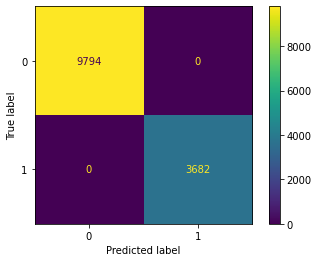

In [ ]:
#Matriz de confusión árbol generado con datos de Train
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(arbolDecisionBase, X_train, Y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


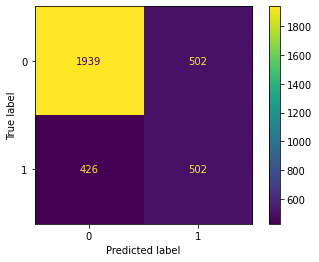

In [ ]:
#Matriz de confusión árbol generado con datos de Test
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(arbolDecisionBase, X_test, Y_test) 

In [ ]:
# Se desea conocer profundidad del DecisionTree
print(arbolDecisionBase.get_depth())

38


Se intentó plotear el árbol para tener una forma visual de verlo pero como se puede ver en la celda anterior, tiene una profundiad de 38 y estaba demorando demasiado. En su lugar se mostraron las matrices de confusión.


*   La primera corresponde a los datos de **train**, se puede ver que clasificó correctamente a todos los elementos del dataset. Cosa que concuerda con el accuracy del 100% 
*   La segunda corresponde a los datos de **test**, se puede ver que clasificó correctamente a la mayor parte del dataset. Cosa que concuerda con el accuracy del 72% 


Obviamente estamos frente a un modelo con un alto overfitting por la gran diferencia que se tiene de accuracy en los datos de train versus los datos de test. Lo que haremos ahora será aplicar GridSearch CV para reducir el overfitting y encontrar los mejores parámetros.

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter sets to test
param_grid = {'max_depth': [ 5, 8, 11, 13],
                'min_samples_leaf': [5, 8, 11, 13],
                'criterion': ['gini', 'entropy'],
                'min_samples_split': [5, 10, 15, 20]}

# Define the model to use
model = tree.DecisionTreeClassifier(random_state=10)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, Y_train)
CV_results_dt = pd.DataFrame(CV_model.cv_results_)
CV_results_dt.to_csv('cv_results_dt.csv')
CV_model.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 15}

In [ ]:
#Función que crea el modelo
def run_model(X_train, X_test, y_train, y_test):
    arbolGridSearchCV = tree.DecisionTreeClassifier(max_depth = 8, min_samples_leaf = 5, min_samples_split=15, criterion='entropy', random_state=9)
    arbolGridSearchCV.fit(X_train, Y_train)
    return arbolGridSearchCV
 
#ejecutamos el modelo 
arbolDecisionGridSearchCV = run_model(X_train, X_test, Y_train, Y_test)

evaluate(arbolDecisionGridSearchCV, X_train, X_test, Y_train, Y_test)

TRAINIG RESULTS:
ACCURACY SCORE:
0.7895
TESTING RESULTS:
ACCURACY SCORE:
0.7711


Se puede ver que tuvimos una mejora en el accuracy y **BAJAMOS EL OVERFITTING** Procedemos ahora a ejecutar de nuevo otro GridSearchCV para ver si podemos ser más precisos con esos parámetros

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter sets to test
param_grid = {'max_depth': [6,8,10],
                'min_samples_leaf': [3,4,5,6,7],
                'criterion': ['gini', 'entropy'],
                'min_samples_split': [13,14,15,16,17]}

# Define the model to use
model = tree.DecisionTreeClassifier(random_state=10)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, Y_train)
CV_results_dt = pd.DataFrame(CV_model.cv_results_)
CV_results_dt.to_csv('cv_results_dt.csv')
CV_model.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 6,
 'min_samples_split': 14}

In [ ]:
#Función que crea el modelo
def run_model(X_train, X_test, y_train, y_test):
    arbolGridSearchCV = tree.DecisionTreeClassifier(max_depth = 8, min_samples_leaf = 6, min_samples_split=14, criterion='entropy', random_state=9)
    arbolGridSearchCV.fit(X_train, Y_train)
    return arbolGridSearchCV
 
#ejecutamos el modelo 
arbolDecisionGridSearchCV = run_model(X_train, X_test, Y_train, Y_test)

evaluate(arbolDecisionGridSearchCV, X_train, X_test, Y_train, Y_test)

TRAINIG RESULTS:
ACCURACY SCORE:
0.7891
TESTING RESULTS:
ACCURACY SCORE:
0.7706


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


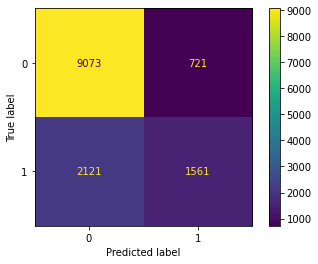

In [ ]:
#Matriz de confusión árbol generado con datos de Train
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(arbolDecisionGridSearchCV, X_train, Y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


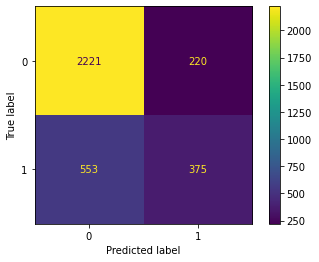

In [ ]:
#Matriz de confusión árbol generado con datos de Test
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(arbolDecisionGridSearchCV, X_test, Y_test) 

**No obtuvimos un mejor modelo al aplicar por segunda vez grid search. Pasamos de tener al principio un modelo con 71% sin modificar hiper parámetros. Luego aplicamos GridSearchCV y obtuvimos uno de 77,11% y luego de aplicar GridSearchCV refinando hiper parámetros obtuvimos 77,06%, que es una menor accuracy pero en este caso se tiene un menor overfitting que en los anteriores modelos**

## Regresión Logistica

In [ ]:
from sklearn.model_selection import train_test_split
# Dividimos en train y test el target y el dataset
X_train, X_test, Y_train, Y_test = train_test_split(dataset, target, test_size=0.2, random_state=42)

In [ ]:
#Función para evaluar cada modelo
def evaluate(model, X_train, X_test, Y_train, Y_test):
    Y_test_pred = model.predict(X_test)
    Y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS:")
    print(f"ACCURACY SCORE:\n{accuracy_score(Y_train, Y_train_pred):.4f}")

    print("=============================== \nTESTING RESULTS:")
    print(f"ACCURACY SCORE:\n{accuracy_score(Y_test, Y_test_pred):.4f}")

Primero se probará con un modelo de regresión logística con hiper parámetros por defecto (no se pone ninguno) y se obtiene el siguiente resultado:

In [ ]:
#Función que crea el modelo
def run_model(X_train, X_test, y_train, y_test):
    regresionBase = LogisticRegression(random_state=8)
    regresionBase.fit(X_train, Y_train)
    return regresionBase
 
#ejecutamos el modelo 
regresionBase = run_model(X_train, X_test, Y_train, Y_test)

evaluate(regresionBase, X_train, X_test, Y_train, Y_test)


TRAINIG RESULTS:
ACCURACY SCORE:
0.7860
TESTING RESULTS:
ACCURACY SCORE:
0.7806


Podemos ver que de antemano obtuvimos un buen modelo, ya que NO tenemos overfitting y además se tiene una accuracy de casi el 80%

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


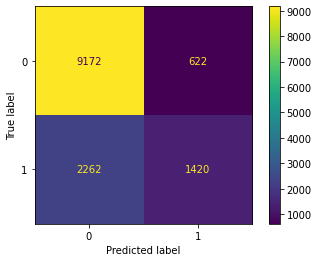

In [ ]:
#Matriz de confusión árbol generado con datos de Train
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(regresionBase, X_train, Y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


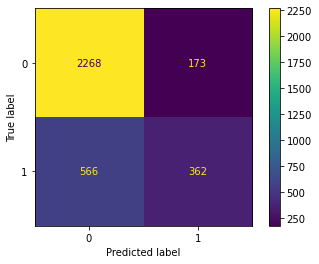

In [ ]:
#Matriz de confusión árbol generado con datos de Test
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(regresionBase, X_test, Y_test) 

In [ ]:
# Calculo fpr (false positive rate) y tpr (true positive rate) para cada threshold
probs = regresionBase.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.7936848415714305

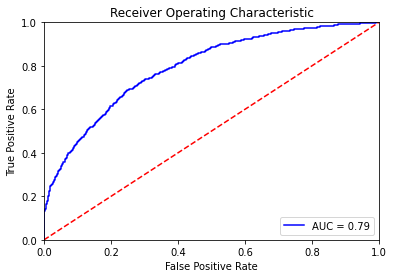

In [ ]:
# Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Viendo la curva ROC también podemos afirmar que se tiene un valor bastante adecuado y que es un buen modelo. De todas maneras aplicaremos GridSearchCV para poder encontrar buenos hiper parámetros. Utilizaremos los parámetros que fueron vistos en la clase de práctico:


*   penalty
*   C
*   solver
*   max_iter



In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter sets to test
param_grid = {'penalty': ["l1", "l2"],
                'solver': ["liblinear"],
                'max_iter': [15, 20, 25, 30],
                'C': [0.08, 0.1 , 0.12],
}

# Define the model to use
model = LogisticRegression(random_state=8)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, Y_train)
CV_results_dt = pd.DataFrame(CV_model.cv_results_)
CV_results_dt.to_csv('cv_results_dt.csv')
CV_model.best_params_

{'C': 0.12, 'max_iter': 15, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
#Función que crea el modelo
def run_model(X_train, X_test, y_train, y_test):
    regresionGridSearchCV = LogisticRegression(C = 0.12, max_iter = 15, penalty = "l1", solver = "liblinear", random_state = 8)
    regresionGridSearchCV.fit(X_train, Y_train)
    return regresionGridSearchCV
 
#ejecutamos el modelo 
regresionGridSearchCV = run_model(X_train, X_test, Y_train, Y_test)

evaluate(regresionGridSearchCV, X_train, X_test, Y_train, Y_test)


TRAINIG RESULTS:
ACCURACY SCORE:
0.7850
TESTING RESULTS:
ACCURACY SCORE:
0.7809


Se puede ver que tuvimos una mejora en el accuracy, pero muy mínima.  Procedemos ahora a ejecutar de nuevo otro GridSearchCV para ver si podemos ser más precisos con esos parámetros

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter sets to test
param_grid = {'penalty': ["l1", "l2"],
                'solver': ["liblinear"],
                'max_iter': [13, 14, 15, 16, 17],
                'C': [0.115, 0.125, 0.135, 0.145, 0.155],
}

# Define the model to use
model = LogisticRegression(random_state=8)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, Y_train)
CV_results_dt = pd.DataFrame(CV_model.cv_results_)
CV_results_dt.to_csv('cv_results_dt.csv')
CV_model.best_params_

{'C': 0.145, 'max_iter': 13, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
#Función que crea el modelo
def run_model(X_train, X_test, y_train, y_test):
    regresionGridSearchCV = LogisticRegression(C = 0.145, max_iter = 13, penalty = "l1", solver = "liblinear", random_state =8)
    regresionGridSearchCV.fit(X_train, Y_train)
    return regresionGridSearchCV
 
#ejecutamos el modelo 
regresionGridSearchCV = run_model(X_train, X_test, Y_train, Y_test)

evaluate(regresionGridSearchCV, X_train, X_test, Y_train, Y_test)


TRAINIG RESULTS:
ACCURACY SCORE:
0.7855
TESTING RESULTS:
ACCURACY SCORE:
0.7812


Al aplicar GridSearchCV vemos que el accuracy vuelve a aumentar pero muy poco. Procedemos ahora a graficar matriz de confusión y curva ROC para este ultimo modelo.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


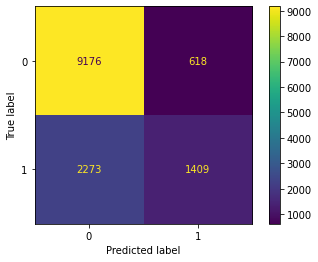

In [ ]:
#Matriz de confusión árbol generado con datos de Train
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(regresionGridSearchCV, X_train, Y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


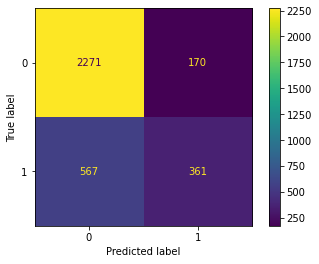

In [ ]:
#Matriz de confusión árbol generado con datos de Test
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(regresionGridSearchCV, X_test, Y_test) 

In [ ]:
# Calculo fpr (false positive rate) y tpr (true positive rate) para cada threshold
probs = regresionGridSearchCV.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.7937161847179646

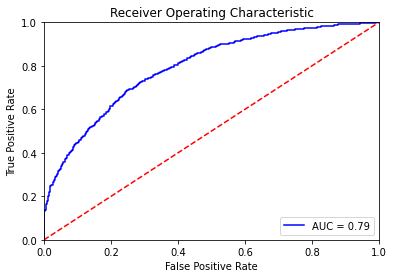

In [ ]:
# Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Vemos que el area bajo la curva es apenas un poquito mayor. Pero pasamos de un primer módelo con un accuracy de 78,06%. Luego aplicamos GridSearchCV y obtuvimos uno de 78,09%. Finalizamos aplicando de nuevo esta técnicas y obtuvimos 78,12%

## Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
# Dividimos en train y test el target y el dataset
X_train, X_test, Y_train, Y_test = train_test_split(dataset, target, test_size=0.2, random_state=42)

In [ ]:
#Función para evaluar cada modelo
def evaluate(model, X_train, X_test, Y_train, Y_test):
    Y_test_pred = model.predict(X_test)
    Y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS:")
    print(f"ACCURACY SCORE:\n{accuracy_score(Y_train, Y_train_pred):.4f}")

    print("=============================== \nTESTING RESULTS:")
    print(f"ACCURACY SCORE:\n{accuracy_score(Y_test, Y_test_pred):.4f}")

Primero se probará con un random forest con hiper parámetros por defecto (no se pone ninguno) y se obtiene el siguiente resultado:

In [ ]:
#Función que crea el modelo
def run_model(X_train, X_test, y_train, y_test):
    randomForestBase = RandomForestClassifier(random_state =8)
    randomForestBase.fit(X_train, Y_train)
    return randomForestBase
 
#ejecutamos el modelo 
randomForestBase = run_model(X_train, X_test, Y_train, Y_test)

evaluate(randomForestBase, X_train, X_test, Y_train, Y_test)

TRAINIG RESULTS:
ACCURACY SCORE:
0.9999
TESTING RESULTS:
ACCURACY SCORE:
0.7993


Podemos ver que nuestro modelo de random forest tiene un overfitting importante. Ya que tenemos un 100% de accuracy en datos de train, pero casi un 80% de accuracy en los datos de test. Procedemos a graficar las matrices de confusión correspondientes y luego haremos GridSearchCV para encontrar la mejor combinación de hiper parámetros

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


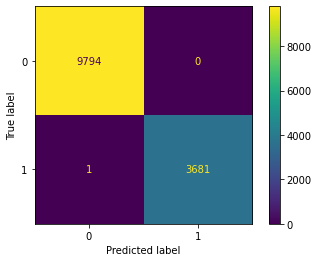

In [ ]:
#Matriz de confusión árbol generado con datos de Train
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(randomForestBase, X_train, Y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


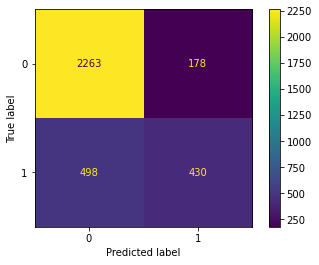

In [ ]:
#Matriz de confusión árbol generado con datos de Test
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(randomForestBase, X_test, Y_test) 

Para realizar GridSearchCV utilizaremos los parámetros del árbol de decisión que nos dio una mejor performance y luego modificaremos los demás


```
{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 15}
 ```



In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter sets to test
param_grid = {'max_depth': [8],
                'min_samples_leaf': [3],
                'criterion': ['entropy'],
                'min_samples_split': [15],
                 "n_estimators" : [50,200,300,400,500],
                 "max_features" : ['sqrt', 'log2']}

# Define the model to use
model = RandomForestClassifier(random_state =8)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, Y_train)
CV_results_dt = pd.DataFrame(CV_model.cv_results_)
CV_results_dt.to_csv('cv_results_dt.csv')
CV_model.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 15,
 'n_estimators': 50}

In [ ]:
#Función que crea el modelo 
def run_model(X_train, X_test, y_train, y_test):
    randomForestGridSearchCV = RandomForestClassifier(max_depth = 8, criterion = "entropy", min_samples_leaf=3, min_samples_split=15, max_features="sqrt", n_estimators=50, random_state = 10)
    randomForestGridSearchCV.fit(X_train, Y_train)
    return randomForestGridSearchCV
 
#ejecutamos el modelo 
randomForestGridSearchCV = run_model(X_train, X_test, Y_train, Y_test)

evaluate(randomForestGridSearchCV, X_train, X_test, Y_train, Y_test)

TRAINIG RESULTS:
ACCURACY SCORE:
0.7943
TESTING RESULTS:
ACCURACY SCORE:
0.7848


Podemos ver que nuestra accuracy bajo un poco, pero ya solucionamos el problema del overfitting. Haremos GridSearchCV nuevamente para refinar los parámetros y ver si podemos aumentar el accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter sets to test
param_grid = {'max_depth': [8],
                'min_samples_leaf': [3],
                'criterion': ["gini", 'entropy'],
                'min_samples_split': [15],
                 "n_estimators" : [45,50,55],
                 "max_features" : ['sqrt', 'log2']}

# Define the model to use
model = RandomForestClassifier(random_state =8)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, Y_train)
CV_results_dt = pd.DataFrame(CV_model.cv_results_)
CV_results_dt.to_csv('cv_results_dt.csv')
CV_model.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 15,
 'n_estimators': 55}

In [ ]:
#Función que crea el modelo
def run_model(X_train, X_test, y_train, y_test):
    randomForestGridSearchCV = RandomForestClassifier(max_depth = 8, criterion = "gini", min_samples_leaf=3, min_samples_split=15, max_features="sqrt", n_estimators=55, random_state=57)
    randomForestGridSearchCV.fit(X_train, Y_train)
    return randomForestGridSearchCV
 
#ejecutamos el modelo 
randomForestGridSearchCV = run_model(X_train, X_test, Y_train, Y_test)

evaluate(randomForestGridSearchCV, X_train, X_test, Y_train, Y_test)

TRAINIG RESULTS:
ACCURACY SCORE:
0.7968
TESTING RESULTS:
ACCURACY SCORE:
0.7863


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


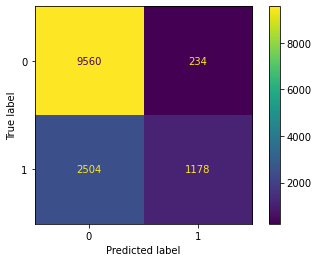

In [ ]:
#Matriz de confusión árbol generado con datos de Train
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(randomForestGridSearchCV, X_train, Y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


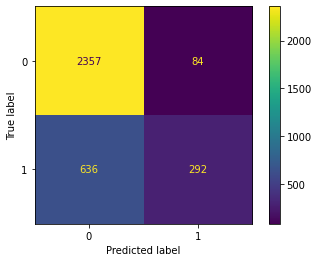

In [ ]:
#Matriz de confusión árbol generado con datos de test
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(randomForestGridSearchCV, X_test, Y_test) 

Pudimos mejorar el modelo. Empezamos con uno con mucho overfitting y un accuracy de 79,93%. Luego aplicamos GridSearchCV y pudimos bajar dicho overfitting pero perdimos un poco de accuracy quedando en 78,48%. Aplicamos GridSearch para poder refinar parámetros y tratar de aumentar el accuracy y lo logramos, quedando al final en 78,63%

## Boosting

In [ ]:
from sklearn.model_selection import train_test_split
# Dividimos en train y test el target y el dataset
X_train, X_test, Y_train, Y_test = train_test_split(dataset, target, test_size=0.2, random_state=42)

In [ ]:
#Función para evaluar cada modelo
def evaluate(model, X_train, X_test, Y_train, Y_test):
    Y_test_pred = model.predict(X_test)
    Y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS:")
    print(f"ACCURACY SCORE:\n{accuracy_score(Y_train, Y_train_pred):.4f}")

    print("=============================== \nTESTING RESULTS:")
    print(f"ACCURACY SCORE:\n{accuracy_score(Y_test, Y_test_pred):.4f}")

Primero se probará con un modelo de boosting con hiper parámetros por defecto (no se pone ninguno) y se obtiene el siguiente resultado:

In [ ]:
#Función que crea el modelo
def run_model(X_train, X_test, y_train, y_test):
    boostingBase = GradientBoostingClassifier(random_state = 8)
    boostingBase.fit(X_train, Y_train)
    return boostingBase
 
#ejecutamos el modelo 
boostingBase = run_model(X_train, X_test, Y_train, Y_test)

evaluate(boostingBase, X_train, X_test, Y_train, Y_test)

TRAINIG RESULTS:
ACCURACY SCORE:
0.8033
TESTING RESULTS:
ACCURACY SCORE:
0.7901


Podemos ver que se generó un modelo bastante bueno a pesar de no tener hiper parámetros y solo usar los que vienen por defecto. No presenta overfitting y tiene un accuracy de casi el 80% en datos de test.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


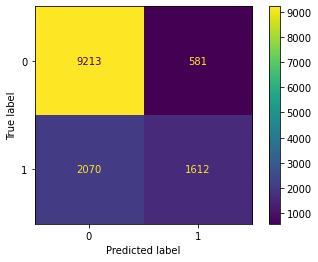

In [ ]:
#Matriz de confusión árbol generado con datos de Train
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(boostingBase, X_train, Y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


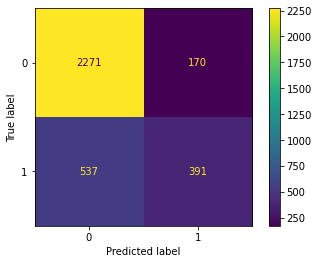

In [ ]:
#Matriz de confusión árbol generado con datos de test
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(boostingBase, X_test, Y_test) 

Aplicaremos GridSearchCV para encontrar buenos hiper parámetros que nos ayuden a mejorar el accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter sets to test
param_grid = {"max_depth":[1,2,3],
                "learning_rate":[0.1,0.3, 0.5],
                 "n_estimators":[100,250],
                 "max_features" : ['sqrt', 'log2']}

# Define the model to use
model = GradientBoostingClassifier(random_state =8)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, Y_train)
CV_results_dt = pd.DataFrame(CV_model.cv_results_)
CV_results_dt.to_csv('cv_results_dt.csv')
CV_model.best_params_

{'learning_rate': 0.3,
 'max_depth': 3,
 'max_features': 'sqrt',
 'n_estimators': 250}

In [ ]:
#Función que crea el modelo
def run_model(X_train, X_test, y_train, y_test):
    boostingBaseGridSearchCV = GradientBoostingClassifier(max_depth=3, learning_rate=0.3, max_features="sqrt", n_estimators=250, random_state = 3)
    boostingBaseGridSearchCV.fit(X_train, Y_train)
    return boostingBaseGridSearchCV
 
#ejecutamos el modelo 
boostingBaseGridSearchCV = run_model(X_train, X_test, Y_train, Y_test)

evaluate(boostingBaseGridSearchCV, X_train, X_test, Y_train, Y_test)

TRAINIG RESULTS:
ACCURACY SCORE:
0.8460
TESTING RESULTS:
ACCURACY SCORE:
0.8050


Podemos ver que aumento el accuracy en test en 80% pero también aumento el accuracy en train llegando a 85% es un modelo con overfitting. Aplicamos GridSearchCV de nuevo para tratar de solucionar esto

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter sets to test
param_grid = {"max_depth":[2,3,4],
                "learning_rate":[0.25, 0.3, 0.35],
                 "n_estimators":[200, 250, 300],
                 "max_features" : ['sqrt', 'log2']}

# Define the model to use
model = GradientBoostingClassifier(random_state =8)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, Y_train)
CV_results_dt = pd.DataFrame(CV_model.cv_results_)
CV_results_dt.to_csv('cv_results_dt.csv')
CV_model.best_params_

{'learning_rate': 0.25,
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 300}

In [ ]:
#Función que crea el modelo 6
def run_model(X_train, X_test, y_train, y_test):
    boostingBaseGridSearchCV = GradientBoostingClassifier(max_depth=4, learning_rate=0.25, max_features="sqrt", n_estimators=300, random_state = 6)
    boostingBaseGridSearchCV.fit(X_train, Y_train)
    return boostingBaseGridSearchCV
 
#ejecutamos el modelo 
boostingBaseGridSearchCV = run_model(X_train, X_test, Y_train, Y_test)

evaluate(boostingBaseGridSearchCV, X_train, X_test, Y_train, Y_test)

TRAINIG RESULTS:
ACCURACY SCORE:
0.8841
TESTING RESULTS:
ACCURACY SCORE:
0.8068


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


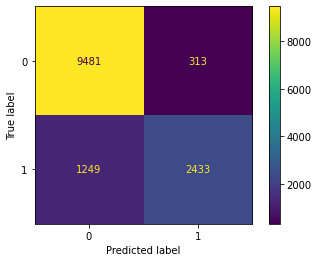

In [ ]:
#Matriz de confusión árbol generado con datos de Train
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(boostingBaseGridSearchCV, X_train, Y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


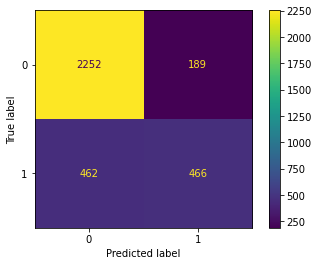

In [ ]:
#Matriz de confusión árbol generado con datos de test
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(boostingBaseGridSearchCV, X_test, Y_test) 

Se puede observar que conseguimos un accuracy mayor con un valor de 80,68% con el segundo GridSearchCV pero vemos que seguimos teniendo overfitting puesto que el accuracy en train es de 88,41%

# Parte 7
Compare la performance de cada uno de ellos y elija el mejor. Justifique su
elección

## Árboles de decisión


*     **Con hiperparámetros vacios:**  
Accuracy en Train:  1.0000  
Accuracy en Test: 0.7245

*   **Primer GridSearchCV:**    
Accuracy en Train:  0.7895  
Accuracy en Test: 0.7711

*   **Segundo GridSearchCV:**   
Accuracy en Train:  0.7891  
Accuracy en Test: 0.7706




In [ ]:
print("Varianza hiperparámetros vacios")
print(1-0.7245)
print("Varianza hiperparámetros primer GridSearchCV")
print(0.7895 -0.7711)
print("Varianza hiperparámetros segundo GridSearchCV")
print(0.7891 -0.7706)

Varianza hiperparámetros vacios
0.27549999999999997
Varianza hiperparámetros primer GridSearchCV
0.018399999999999972
Varianza hiperparámetros segundo GridSearchCV
0.018500000000000072


## Regresión Logística


*     **Con hiperparámetros vacios:**  
Accuracy en Train:  0.7860  
Accuracy en Test: 0.7806  

*   **Primer GridSearchCV:**    
Accuracy en Train:  0.7851  
Accuracy en Test: 0.7809

*   **Segundo GridSearchCV:**   
Accuracy en Train:  0.7855  
Accuracy en Test: 0.7812





In [ ]:
print("Varianza hiperparámetros vacios")
print(0.7860- 0.7806)
print("Varianza hiperparámetros primer GridSearchCV")
print(0.7851 - 0.7809)
print("Varianza hiperparámetros segundo GridSearchCV")
print(0.7855 - 0.7812)

Varianza hiperparámetros vacios
0.005400000000000071
Varianza hiperparámetros primer GridSearchCV
0.0041999999999999815
Varianza hiperparámetros segundo GridSearchCV
0.0042999999999999705


## Random Forest


*     **Con hiperparámetros vacios:**  
Accuracy en Train:  0.9999  
Accuracy en Test: 0.7993 

*   **Primer GridSearchCV:**    
Accuracy en Train:  0.7943  
Accuracy en Test: 0.7848

*   **Segundo GridSearchCV:**   
Accuracy en Train:  0.7968  
Accuracy en Test: 0.7863 






In [ ]:
print("Varianza hiperparámetros vacios")
print(0.9999- 0.7993)
print("Varianza hiperparámetros primer GridSearchCV")
print(0.7943 - 0.7848)
print("Varianza hiperparámetros segundo GridSearchCV")
print(0.7968 - 0.7863)

Varianza hiperparámetros vacios
0.2006
Varianza hiperparámetros primer GridSearchCV
0.009499999999999953
Varianza hiperparámetros segundo GridSearchCV
0.010499999999999954


## Boosting

*     **Con hiperparámetros vacios:**  
Accuracy en Train:  0.8033  
Accuracy en Test: 0.7901

*   **Primer GridSearchCV:**    
Accuracy en Train:  0.8460  
Accuracy en Test: 0.8050 


*   **Segundo GridSearchCV:**   
Accuracy en Train:  0.8841  
Accuracy en Test: 0.8068

In [ ]:
print("Varianza hiperparámetros vacios")
print(0.8033 - 0.7901)
print("Varianza hiperparámetros primer GridSearchCV")
print(0.8460 - 0.8050)
print("Varianza hiperparámetros segundo GridSearchCV")
print(0.8841 - 0.8068)

Varianza hiperparámetros vacios
0.01319999999999999
Varianza hiperparámetros primer GridSearchCV
0.040999999999999925
Varianza hiperparámetros segundo GridSearchCV
0.07730000000000004


## Elección del mejor modelo
Descarto los árboles de decisión porque fue el algoritmo que nos dio una peor accuracy en test. Si vemos los de regresión logística son los que tienen una mejor performance porque la diferencia entre el accuracy entre datos de train y test es super mínima.

Si vamos a los algoritmos de ensemble, boosting fue el que nos dio mejor accuracy en datos de test llegando al 80% pero por otro lado se tiene un poco de overfitting. En cuanto a random forest al aplicar GridSearchCV se obtienen buenos modelos pero no superan a los de regresión logística.

**Por lo tanto, el modelo más performante es el algoritmo de regresión logística en el primer GridSearchCV: no presenta overfitting y se tiene un accuracy del 78%**


# Parte 8
Elija un modelo para calcular importancia de variables. ¿Coincide con lo que se
analizó en el punto 3? ¿Cuáles son las 2 variables más importantes del modelo?

Para hacer esta parte usaremos el modelo que elegimos anteriormente.

In [ ]:
from sklearn.model_selection import train_test_split
# Dividimos en train y test el target y el dataset
X_train, X_test, Y_train, Y_test = train_test_split(dataset, target, test_size=0.2, random_state=42)

In [ ]:
#Función que crea el modelo
def run_model(X_train, X_test, y_train, y_test):
    regresionGridSearchCV = LogisticRegression(C = 0.12, max_iter = 15, penalty = "l1", solver = "liblinear", random_state = 8)
    regresionGridSearchCV.fit(X_train, Y_train)
    return regresionGridSearchCV
 
#ejecutamos el modelo 
regresionGridSearchCV = run_model(X_train, X_test, Y_train, Y_test)

evaluate(regresionGridSearchCV, X_train, X_test, Y_train, Y_test)


TRAINIG RESULTS:
ACCURACY SCORE:
0.7850
TESTING RESULTS:
ACCURACY SCORE:
0.7809


Feature: A - Score: 0.060912846855631246
Feature: B - Score: 0.5497004748636263
Feature: C - Score: -0.12055713692216964
Feature: D - Score: 0.058088291034756184
Feature: E - Score: -0.04597893864957796
Feature: F - Score: -0.013018473562481868
Feature: H - Score: 0.02952706944396095
Feature: K - Score: -0.3880369118222403
Feature: L - Score: 0.050433575046210946
Feature: M - Score: 0.11954213050481571
Feature: N - Score: 0.04033169410903729
Feature: O - Score: 0.04029411822258738
Feature: P - Score: 0.14335478195471152
Feature: Q - Score: 0.12369285977959678
Feature: R - Score: -0.04337738097579805
Feature: S - Score: 0.33936098068095966
Feature: T - Score: -0.0040383228540686955
Feature: J_AR - Score: -0.06781925705198276
Feature: J_BR - Score: -0.4959980901788502
Feature: J_ES - Score: 0.49340923047958263
Feature: J_MX - Score: 0.624315731520236
Feature: J_US - Score: 0.305046666370992
Feature: J_UY - Score: 0.0


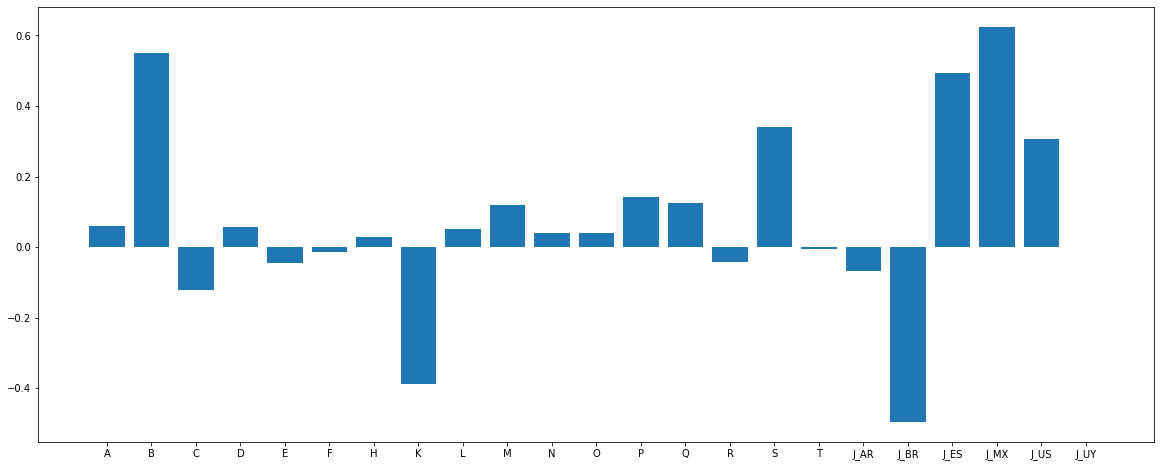

In [ ]:
# get importance
importance = regresionGridSearchCV.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature:', X_train.columns[i], '- Score:', v)
# plot feature importance
plt.figure(figsize=(20,8))
plt.bar(X_train.columns, importance)
plt.show()

Como estamos en un problema de clasificación binaria los coeficientes son ambos positivos y negativos, van desde -1 a 1. Un score positivo indica una feature que predice 1, mientras que un score negativo indica una feature que predice 0

En la parte 3 de este obligatorio se dijo lo siguiente 

```
Las mejores columnas (que tienen mejor correlación con la variable target) 
serían las columnas: B, K y S. Son las que tienen una mejor correlación. 

Ahora si hablamos de la variable categórica que pasamos a numérica. 
Cuando J es "ES" se tiene un valor de correlación de 0,21. 
Luego con BR y MX se tiene de -0,17 y 0,17 respectivamente. 
Para finalizar J_US con 0,15
```

Al ver la grafica, efectivamente podemos ver que las features que tienen un score más grande son las que nombramos en esa parte del obligatorio, o sea, coinciden. Y respondiendo la pregunta de esta parte, las dos variables más importantes de este modelo son J_BR que ayuda a predecir class 0 y J_MX que ayuda a predecir class 1
